# Investigation of Methane Activation over NiO/CZ using in-situ FTIR Spectroscopy

# Import Packages and Pre-Defined Functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit, Minimizer
import time
from sklearn.metrics import r2_score
from ipynb.fs.full.functions import get_first_nbr_from_str, baseline_als, Data_import

In [3]:
from ipynb.fs.full.functions import Voigt, Gaussian
from ipynb.fs.full.functions import Generate_data, Generate_params, loss_func, Plot_data, Plot_com_data, Final_plot, Print_var, Final_print
from ipynb.fs.full.functions import Generate_Vec_IG, Generate_data_IG, loss_func_IG, Generate_params_IG, Plot_data_IG, Plot_com_data_IG

In [6]:
import seaborn as sns

# Import Data

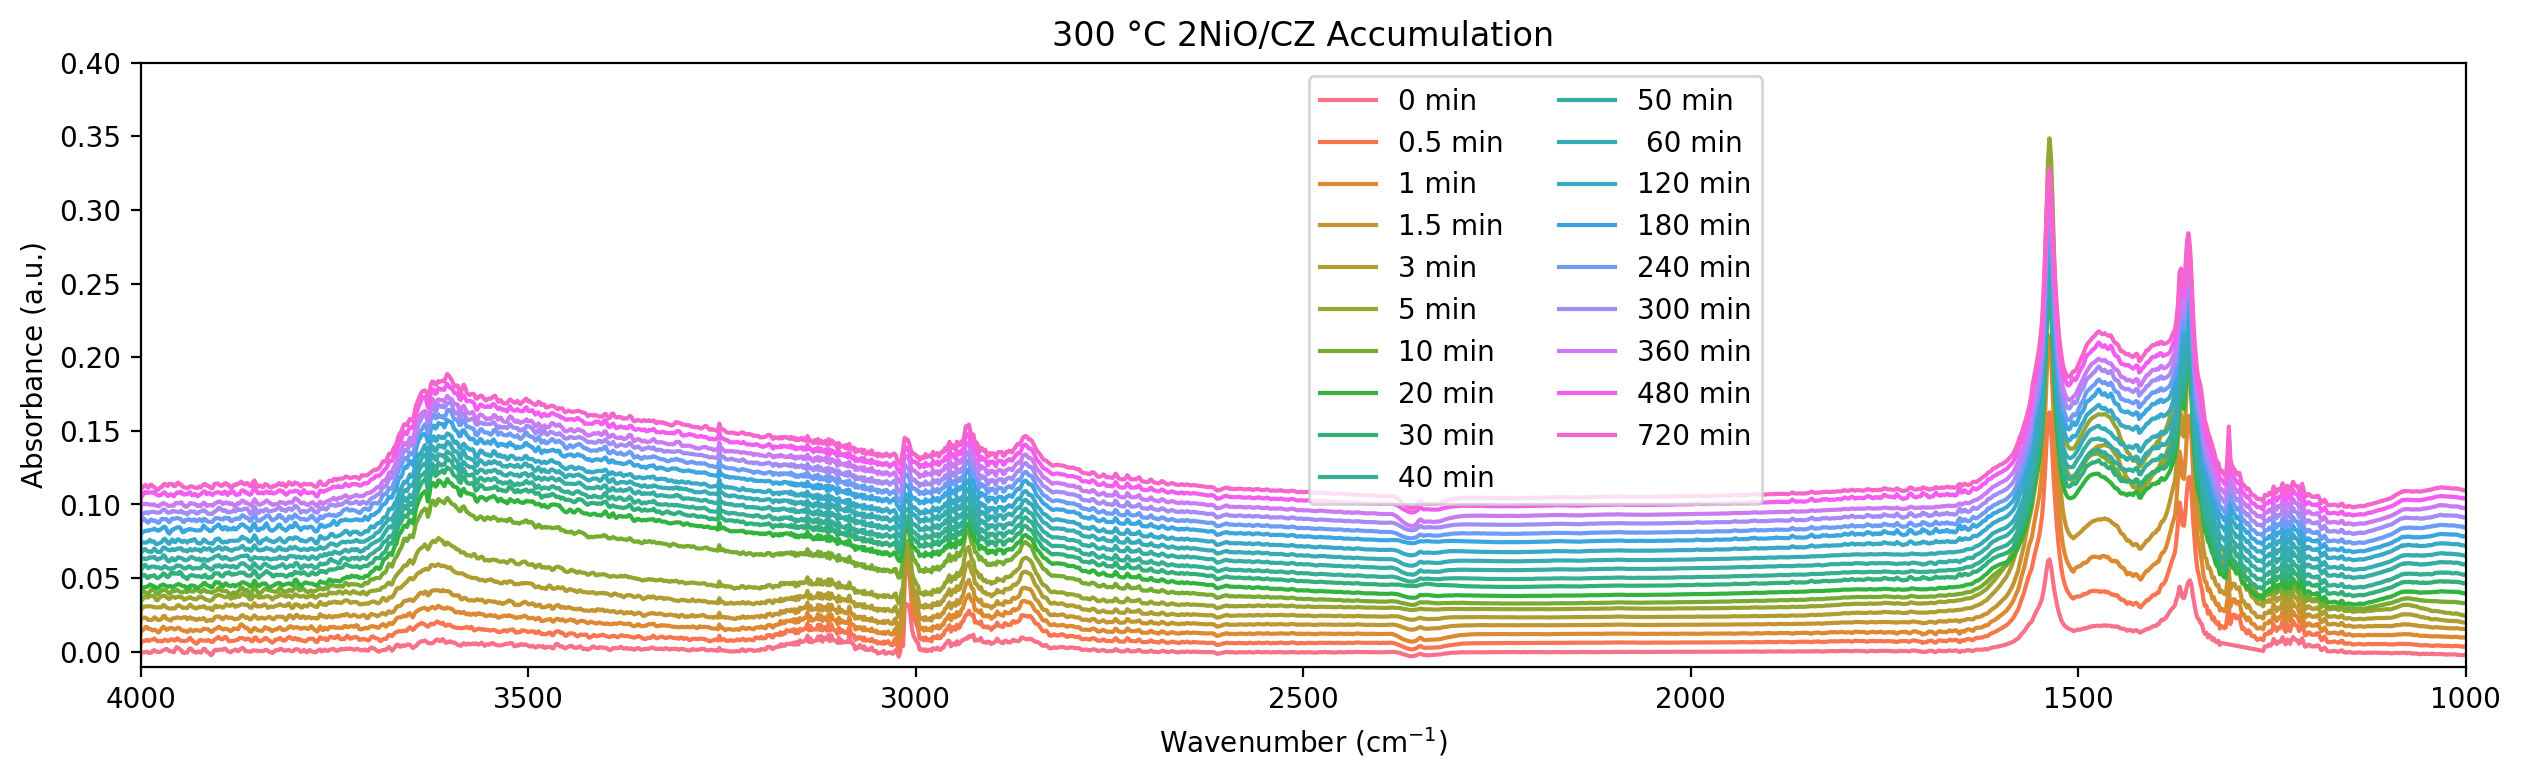

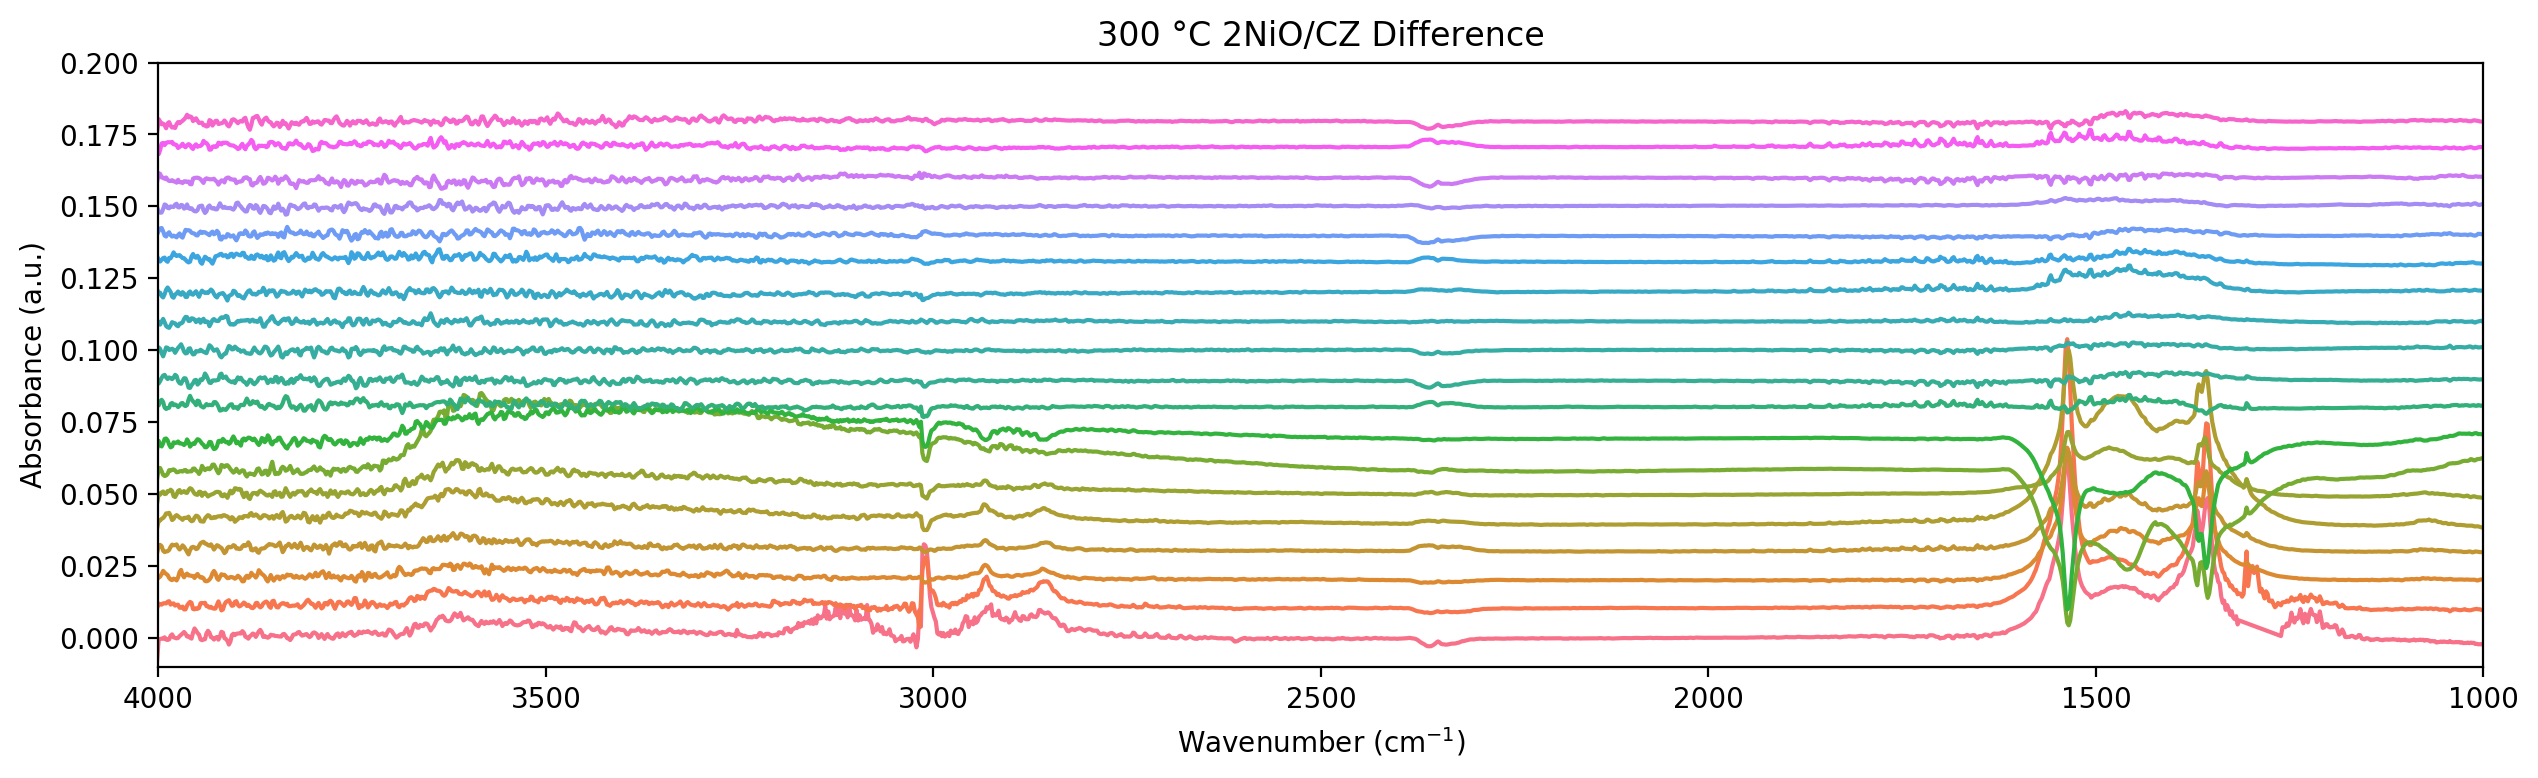

In [17]:
df = pd.read_excel('data/20200916_cleaned.xlsx',sheet_name='dif')
dif = df[df.columns[1:]]
df = pd.read_excel('data/20200916_cleaned.xlsx',sheet_name='acu')
acu = df[df.columns[1:]]
column_num = np.shape(df)[1]
sns.color_palette(n_colors = column_num)
Index = 1
Tem = 300
Sample = '2NiO/CZ'
fig, ax = plt.subplots(1,1,figsize = (15,4),dpi=200)
ADF = 0.006
DDF = 0.01
for i in range(Index+1,column_num):
    ax.plot(acu[acu.columns[0]],acu[df.columns[i]]+ ADF*(i-Index-1),label=df.columns[i])
ax.set_ylim((-0.01,0.4))
ax.set_xlim(1000,4000)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance (a.u.)')
ax.set_title('{} \xb0C {} Accumulation'.format(Tem, Sample))
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.6, 1.00), ncol=2)
    
fig, ax = plt.subplots(1,1,figsize = (15,4),dpi=200)
for i in range(Index+1,column_num):
    ax.plot(dif[dif.columns[0]],dif[df.columns[i]]+ DDF*(i-Index-1),label=df.columns[i])
ax.set_ylim((-0.01,0.2))
ax.set_xlim(1000,4000)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance (a.u.)')
ax.set_title('{} \xb0C {} Difference'.format(Tem, Sample))
ax.invert_xaxis()

## Process Data by Region

10.0
20.0
30.0
120.0
180.0
300.0
480.0
720.0
The fitted region started at 2809.82 cm-1, and ended at 2981.457 cm-1.


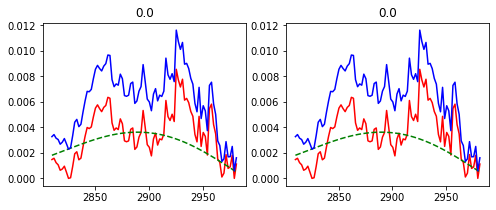

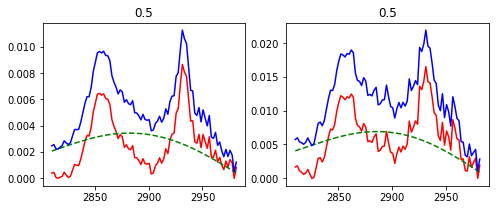

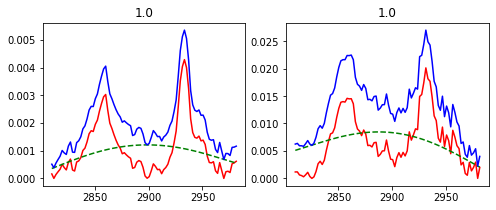

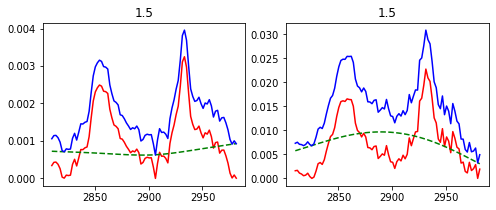

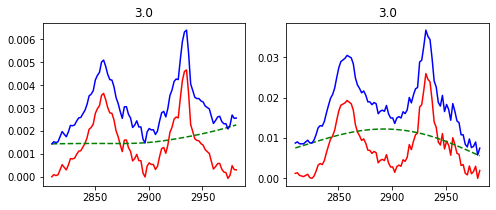

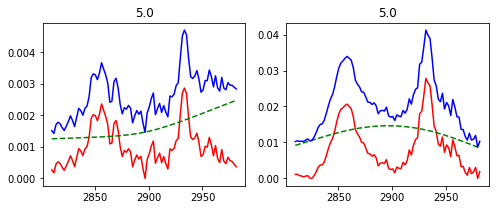

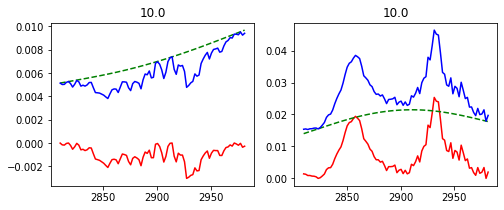

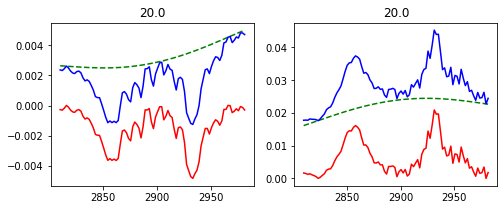

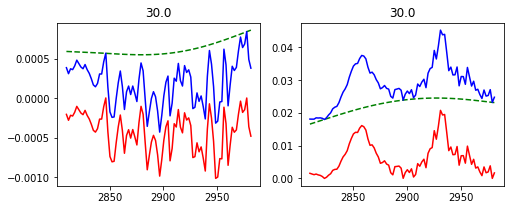

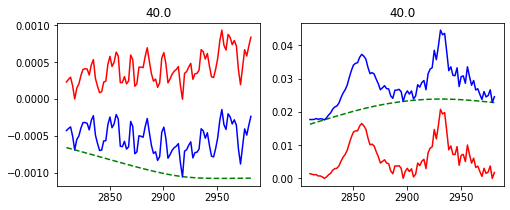

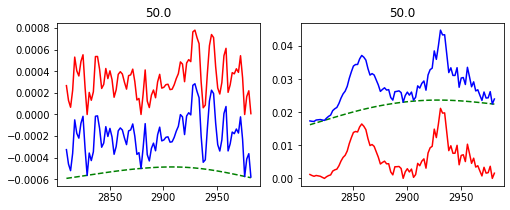

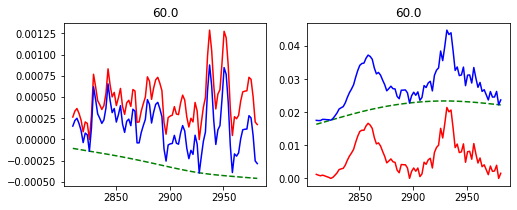

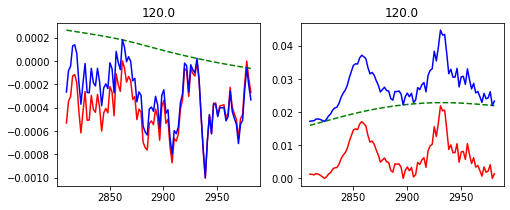

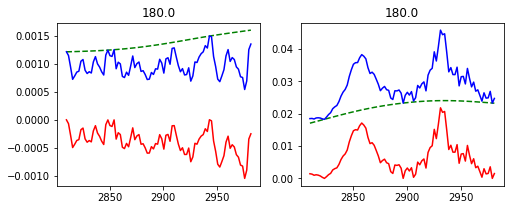

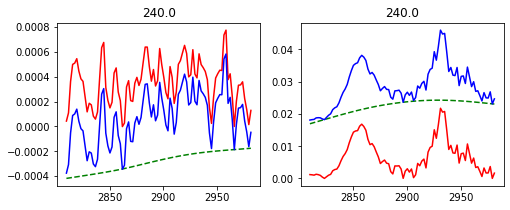

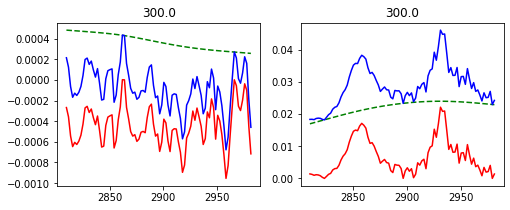

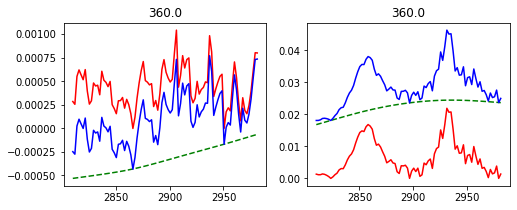

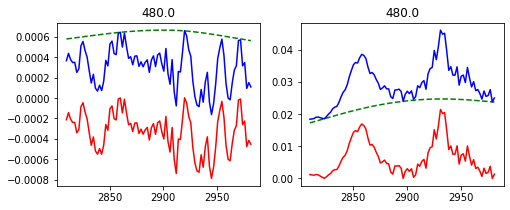

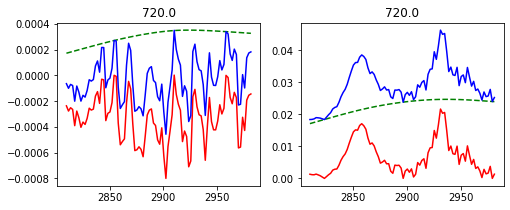

In [30]:
column_num = np.shape(dif)[1]
SCH = 1250     #start index of CH 
ECH = 1340     #end index of CH
a = np.transpose(acu[[dif.columns[0]]][SCH:ECH].to_numpy())
WN = a[0]
CH_acu = []
CH_dif = []
Time = np.zeros(column_num-1)

for i in range(1,column_num):
    Time[i-1] = get_first_nbr_from_str(dif.columns[i])
    a = np.transpose(dif[[dif.columns[i]]][SCH:ECH].to_numpy())
    a = a[0]
    ##baseline correction
    if a[38] < a[0]:
        print(get_first_nbr_from_str(dif.columns[i]))
        b = -a
        bsl = baseline_als(b, 105, 0.0001)
        y = -(b - bsl)
        bsl = -bsl
    else:
        bsl = baseline_als(a, 105, 0.0001)
        y = a - bsl

    
    a_acu = np.transpose(acu[[dif.columns[i]]][SCH:ECH].to_numpy())[0]
    bsl_acu = baseline_als(a_acu, 105, 0.0001)
    y_acu = a_acu-bsl_acu
    CH_dif.append(y)
    CH_acu.append(y_acu)
    fig,ax = plt.subplots(1,2,figsize=(8,3))
    ax[0].plot(WN,y,'r')
    ax[0].plot(WN,bsl,'g--')
    ax[0].plot(WN,a,'b')
    ax[0].set_title(Time[i-1])
    ax[1].plot(WN,y_acu,'r')
    ax[1].plot(WN,bsl_acu,'g--')
    ax[1].plot(WN,a_acu,'b')
    ax[1].set_title(Time[i-1]) 
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))
x_CH = np.array(WN)
y_CH = np.array(CH_acu)
Time = np.array(Time)

In [22]:
column_num_new = np.shape(dif)[1]
S = 455
E = 675
b = np.transpose(dif[[dif.columns[0]]][S:E].to_numpy())
WN = b[0]
CC = []
CC_acu = []

for i in range(1,column_num_new):
    a = np.transpose(dif[[dif.columns[i]]][S:E].to_numpy())
    b = np.transpose(acu[[dif.columns[i]]][S:E].to_numpy())
    CC.append(a[0])
    CC_acu.append(b[0])
x_CC = np.array(WN)
y_CC = np.array(CC)
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))

The fitted region started at 1276.665 cm-1, and ended at 1699.006 cm-1.


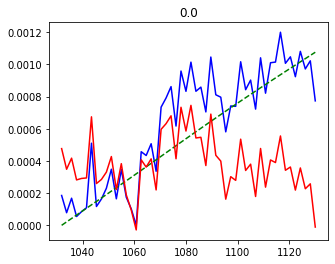

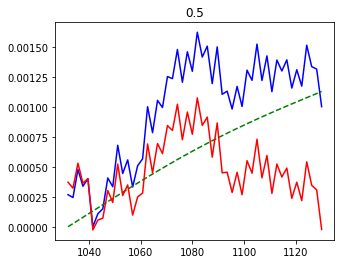

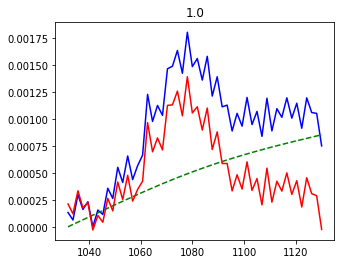

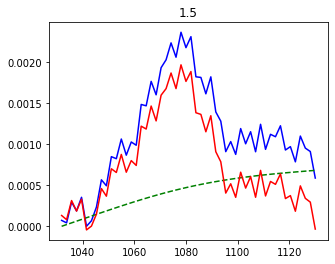

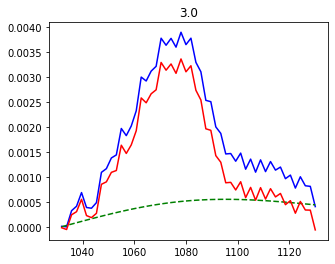

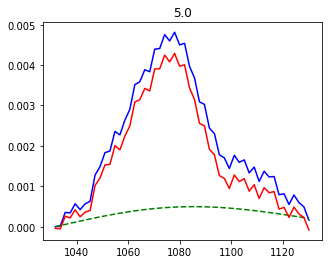

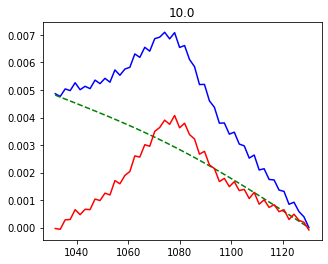

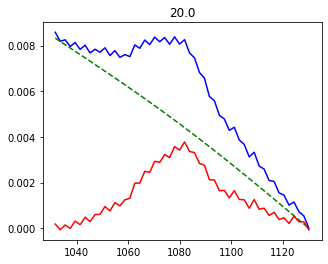

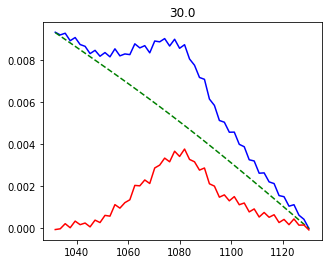

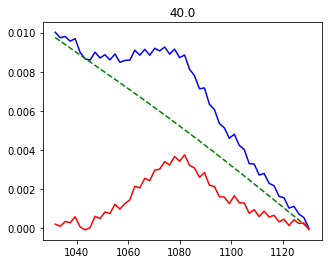

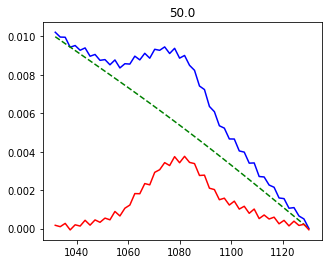

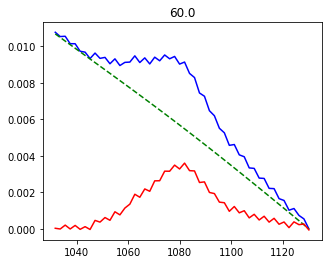

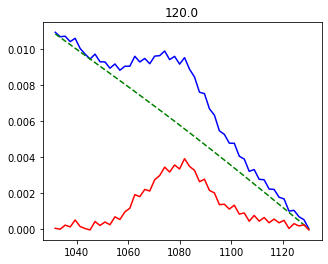

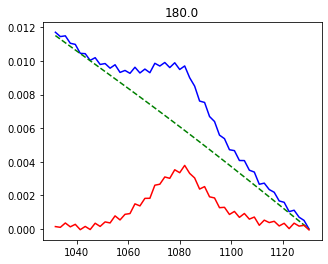

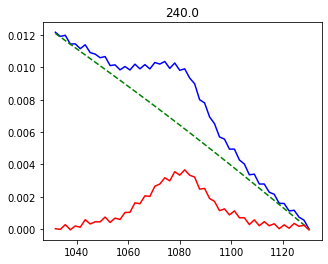

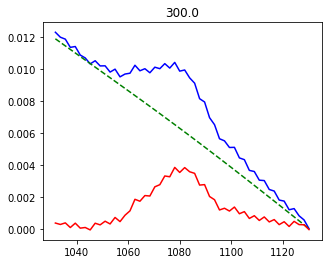

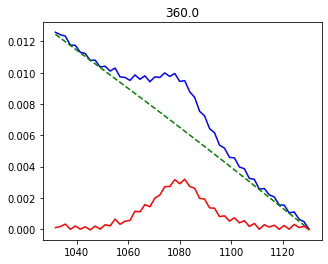

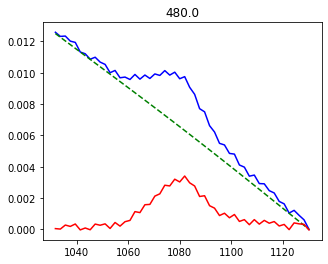

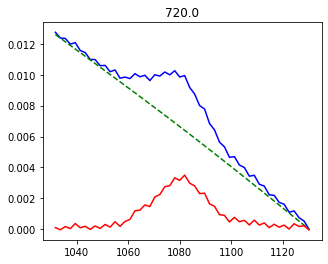

In [203]:
SCO = 328
ECO = 380
LCO = ECO-SCO
b = np.transpose(dif[[dif.columns[0]]][SCO:ECO].to_numpy())
WN = b[0]
CO = []

for i in range(1,column_num):
    a = np.transpose(acu[[dif.columns[i]]][SCO:ECO].to_numpy())
    bsl = baseline_als(a[0], 1005, 0.002)
    y = a[0] - bsl
    CO.append(y)
    fig = plt.figure(figsize=(5,4))
    plt.plot(WN,a[0]-a[0].min(),'b-')
    plt.plot(WN,bsl-bsl.min(),'g--')
    plt.plot(WN,CO[-1],'r-')
    plt.title(Time[i-1])


x_CO = np.array(WN)
y_CO = np.array(CO)

## Finding a good initial guess

By implementing the lmfit package, we can performance the optimzation of our loss function by minimizing the least square of the difference between the model and actual data. The 'leastsq' method from the lmfit package uses the 'Levenberg-Marquardt' algorithm for the minization. While often criticized, including the fact it finds
a local minima, this approach has some distinct advantages. These include being fast, and well-behaved for most
curve-fitting needs, and making it easy to estimate uncertainties for and correlations between pairs of fit variables. Still the disadvantage of the 'Levenberg-Marquardt' algorithm which is its looking for local minima should be addressed. Hence, the first step in our modeling methodology is finding a reasonable initial guess so that further optimization would have better performances. 

## Fitting the C-H vibrations

In [40]:
Vec_IG = {'Mus':np.array([2861.9,2853.1,2952,2934.2]),
          'Sigmas':np.array([6.7,3.6,4.1,2.9]),
          'Types':np.array([1,1,1,1]),
          'Lims':{'Positive':True,
                  'Mus_min':np.array([2840,2845,2900,2900]),
                  'Mus_max':None}}

In [41]:
t0 = time.time()
fit_params_IG = Generate_params_IG(x_CH,Vec_IG,ndata = 19)

fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CH, y_CH, Vec_IG))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 49.66715407371521


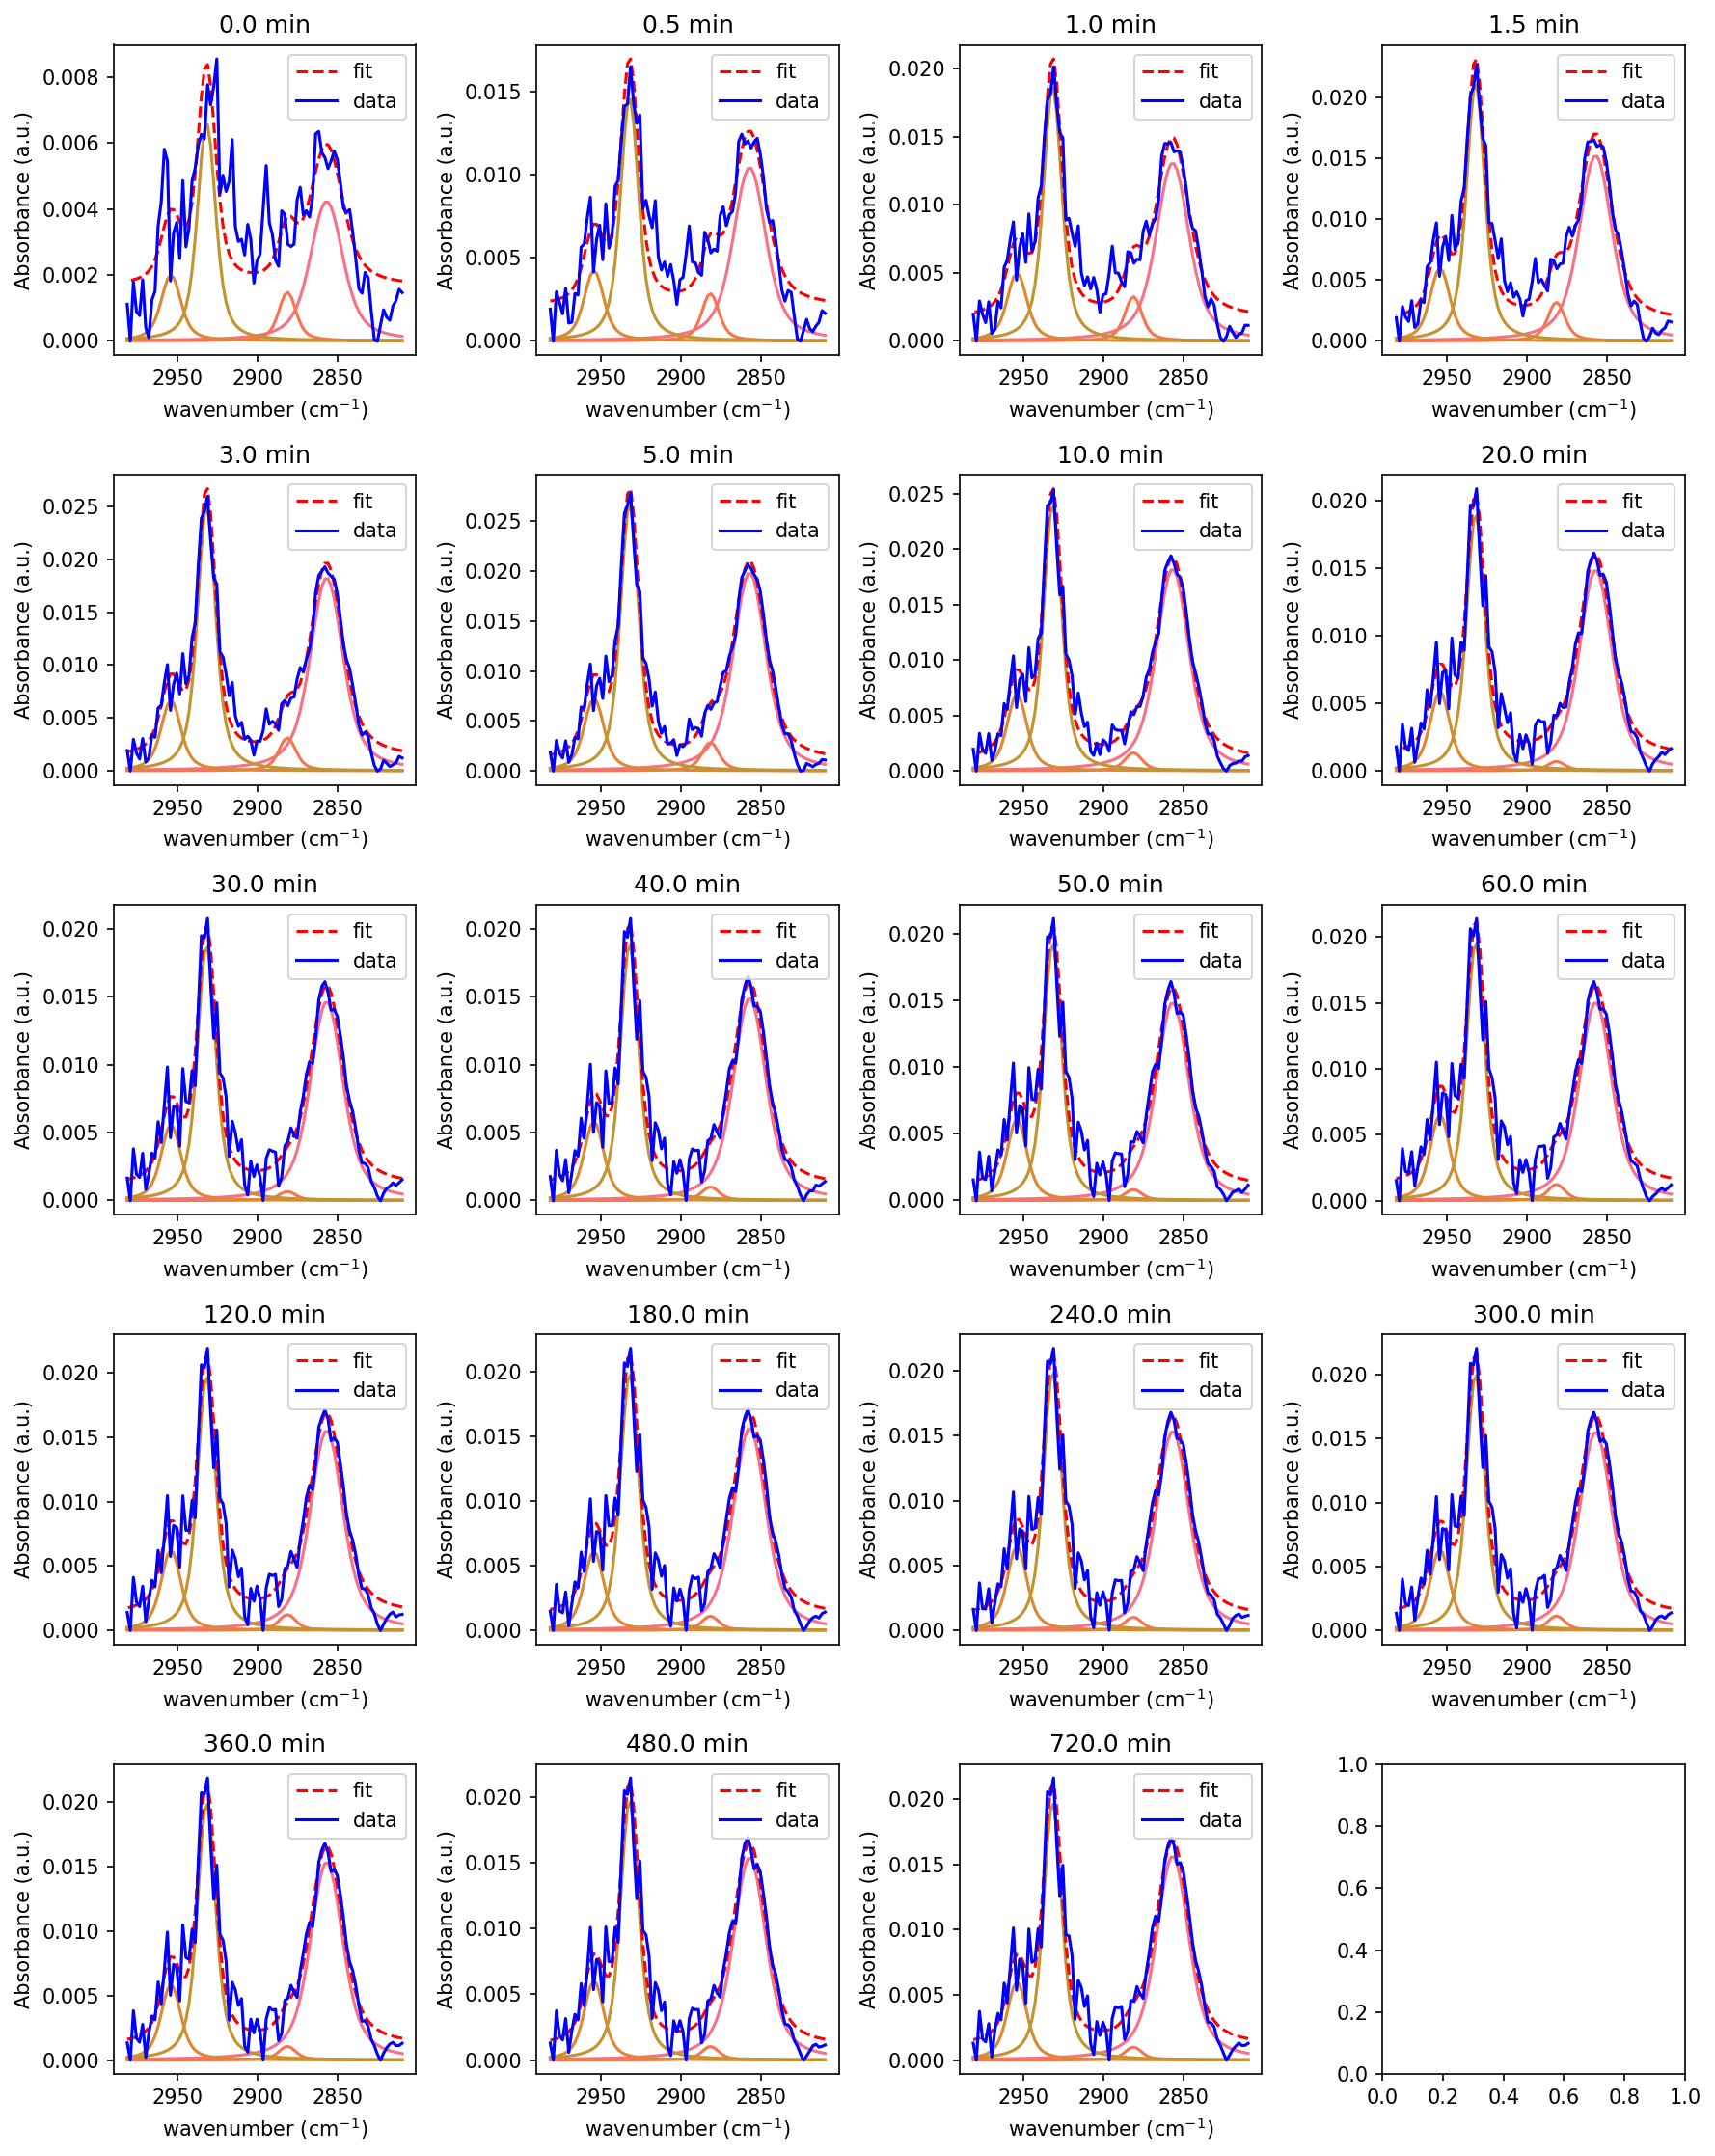

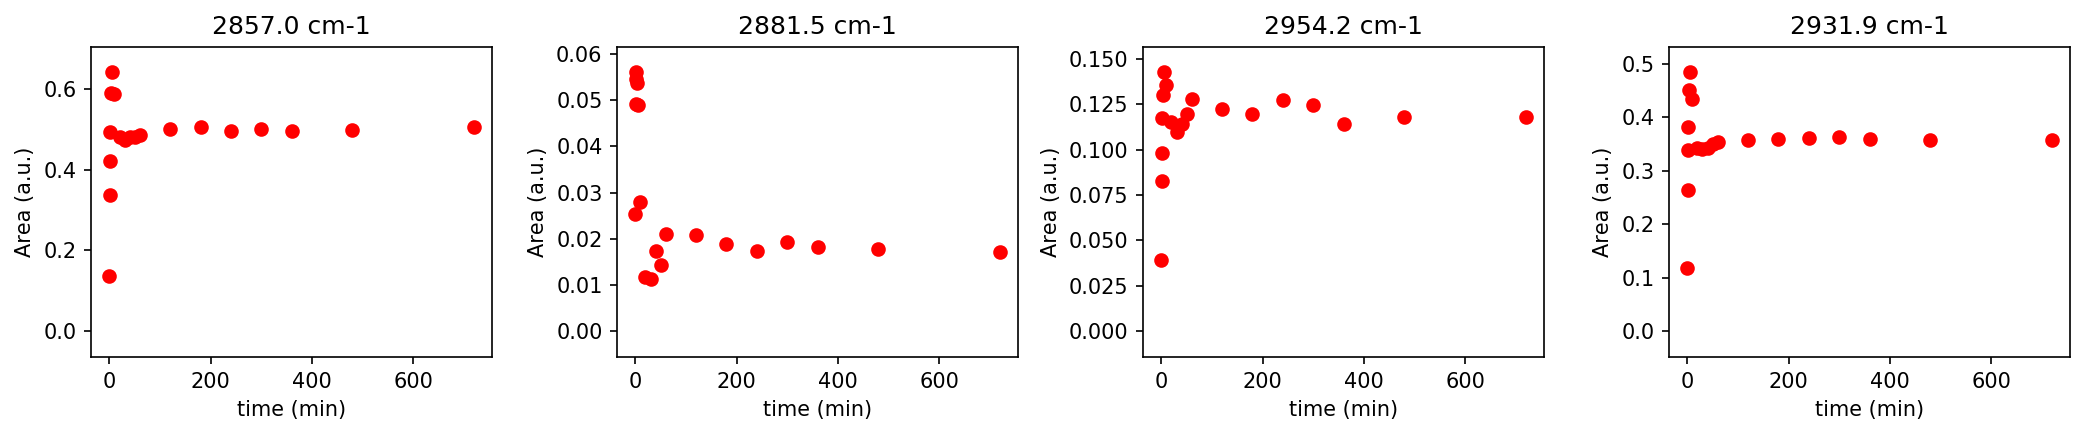

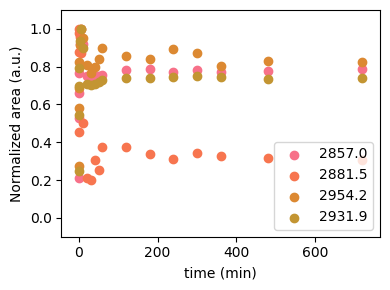

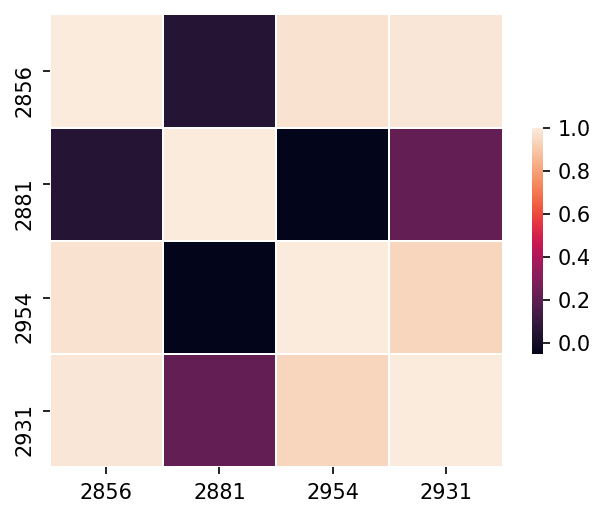

{'Peak Pos': [2856, 2881, 2954, 2931],
 'Amps': array([[0.13644214, 0.02539064, 0.03912135, 0.11889248],
        [0.33729245, 0.04910255, 0.08298887, 0.26439822],
        [0.42244364, 0.05604802, 0.09803637, 0.33763329],
        [0.49221061, 0.05469164, 0.1175246 , 0.38223174],
        [0.58902684, 0.05367983, 0.13024141, 0.45120884],
        [0.64059838, 0.04897675, 0.14266158, 0.48345448],
        [0.58800436, 0.02807731, 0.13543493, 0.43396296],
        [0.47945891, 0.01175697, 0.11506762, 0.34306469],
        [0.47312085, 0.01128314, 0.10957037, 0.33958705],
        [0.48072258, 0.0172672 , 0.11416159, 0.3412977 ],
        [0.47943301, 0.01425019, 0.11969678, 0.34876452],
        [0.4856915 , 0.02109545, 0.12798935, 0.35354037],
        [0.50124505, 0.02090793, 0.12248701, 0.3567247 ],
        [0.50489076, 0.01882136, 0.11991761, 0.35826383],
        [0.49556442, 0.01733087, 0.12723194, 0.36000372],
        [0.50165864, 0.01931562, 0.1246159 , 0.36217783],
        [0.49460176, 0.01

In [42]:
params_IG = result.params
Plot_data_IG(params_IG,x_CH,y_CH,Vec_IG,Time,False)

In [49]:

Vec_IG_struc = {'Peaks':[[0,1,2,3]], #Index of peaks that are from the same species
                'Types':[[1,1,1,1]]} #Peak type of each peak in this vector

Vec_fit = Generate_Vec_IG(params_IG,Vec_IG_struc,18)
Vec_fit['Alphas'] = None
Vec_fit['Vec0']['Mus'] = np.array([2847.1,2860.9,2940.8,2951.8])
Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
                           'Specs':np.array([[2840,2850,2900,2945],
                                            [2875,2875,4000,4000],
                                            [1.5,1.5,1.5,0.6],
                                            [6.5,6.5,6.5,6.5],
                                            [0.00001,0.00001,0.0001,0.001]]),
                           'Pos': None}

In [50]:
t0 = time.time()
fit_params = Generate_params(x_CH,Vec_fit,ndata = 19)

fitter = Minimizer(loss_func, fit_params, fcn_args=(x_CH, y_CH, Vec_fit))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 6.738735653507442 1.5 6.5
0 2847.1 2840.0 2875.0
0 3.6 1.5 6.5
0 2860.9 2850.0 2875.0
0 4.1 1.5 6.5
0 2940.8 2910.8 2970.8
0 3.7699999821651233 0.6 6.5
0 2951.8 2945.0 2981.8
The time cost is: 4.509204149246216


In [51]:
new_params = result.params
yhat_CH = Generate_data(new_params,x_CH,Vec_fit,ndata=19)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CH.flatten(), yhat_CH.flatten())))

The R2 score of the fit is: 0.94


Plotting.....


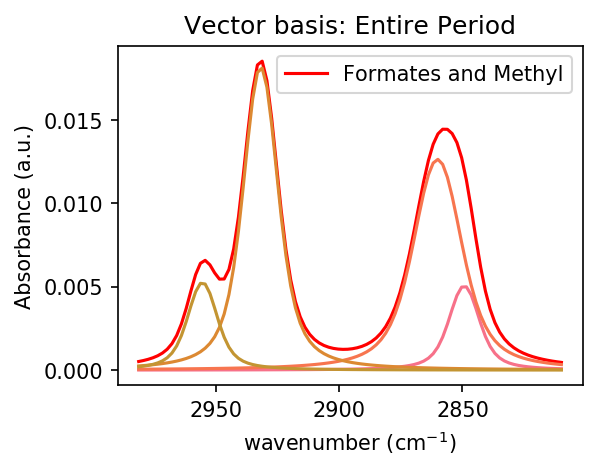

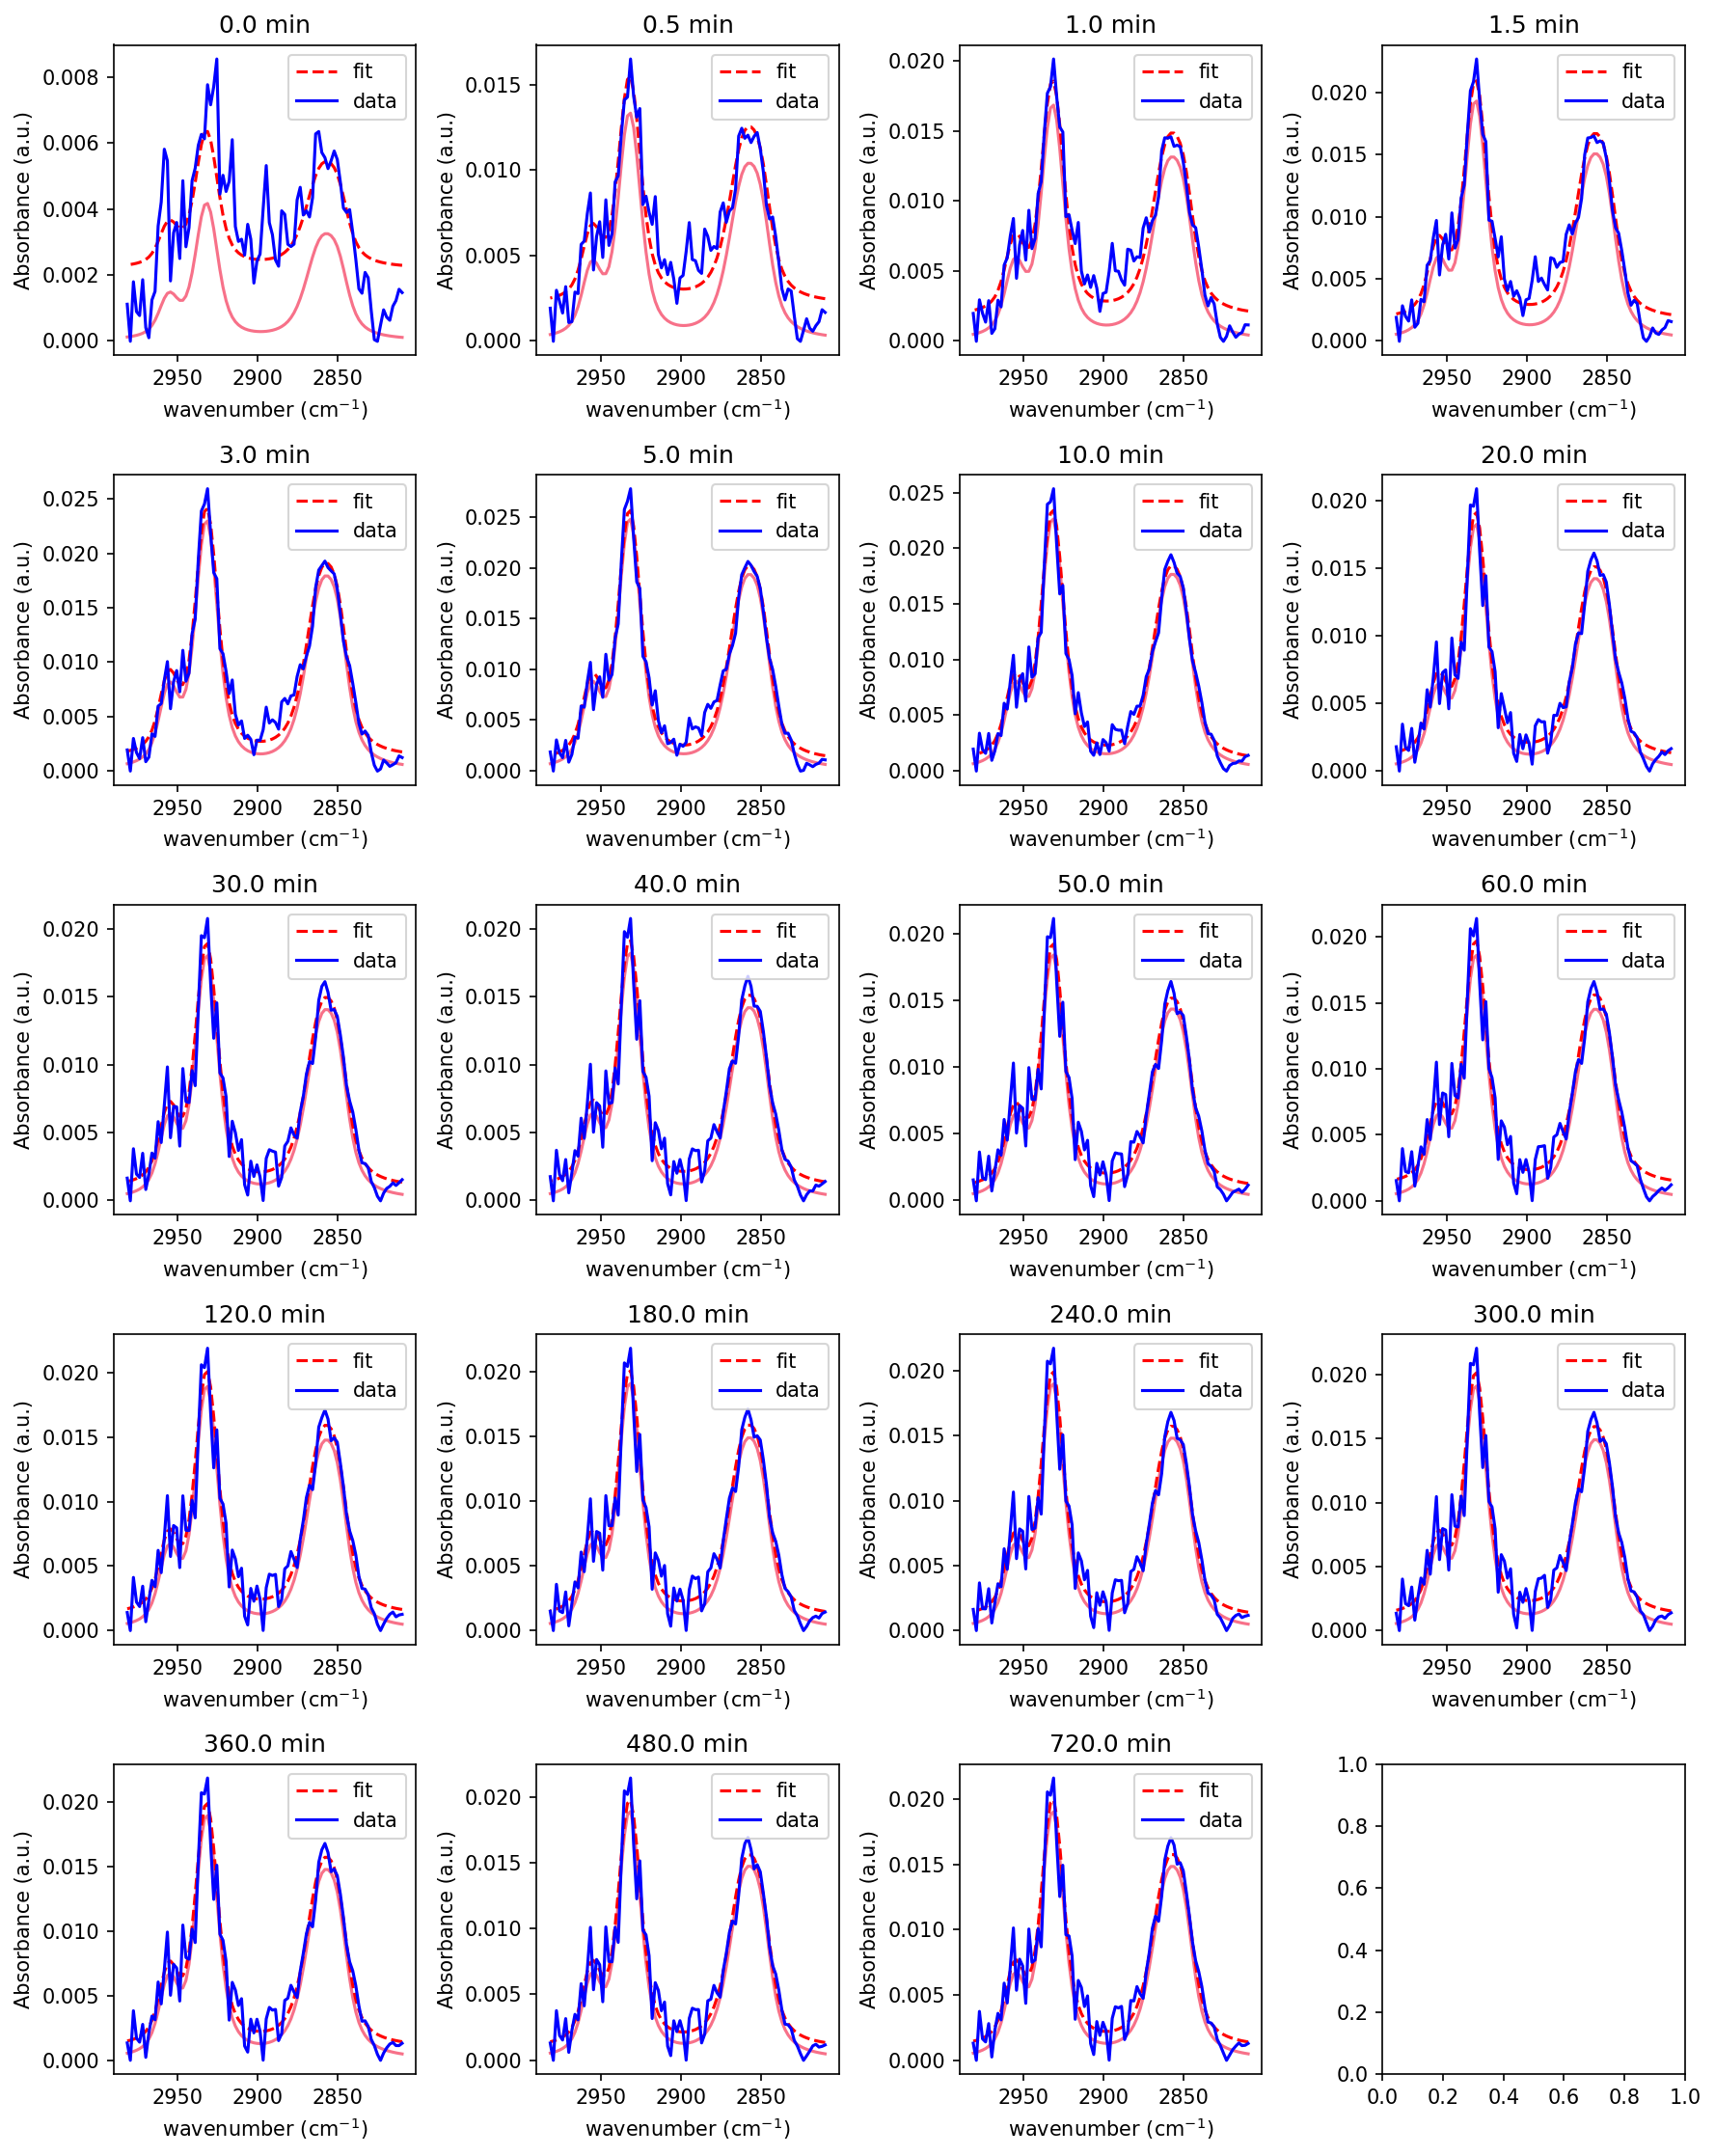

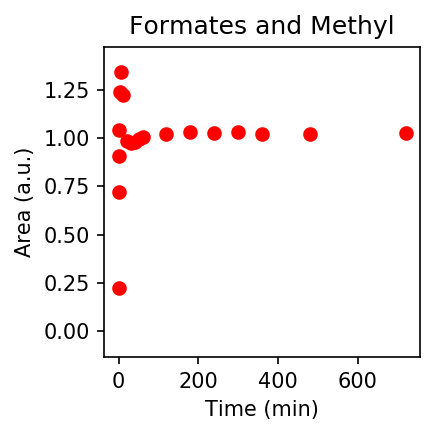

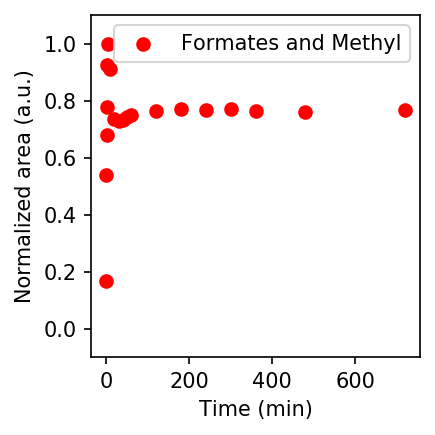

In [52]:
Vec_name=np.array(['Formates and Methyl'])
data_CH = Plot_data(new_params,x_CH,y_CH,Vec_fit,Time,Vec_name,False)

## Fitting the 1300-1700 cm$^{-1}$ region

We want to include a peak around 1600 cm$^{-1}$ as the C=O species, two peaks around 1540 cm$^{-1}$ for carbonates, 4 peaks around 1300 cm$^{-1}$ to 1500 cm$^{-1}$ for aromatics and finally, a two peaks around 1350 cm$^{-1}$ for the formates.

We wanna repeat the previous procedure, i.e.:

    1) Make an initial guess on all the peaks
    2) Group the peaks and creat a vector space
    3) Use the new vector basis to perform non-linear regression fit for optimization of the parameters
   


### Fitting the initial stage (0,10) min

We use postfix _CC0 for fitting of this period.

Below is an intial guess of the peaks.

In [90]:
Vec_IG_CC0 = {'Mus':np.array([1580.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.625,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':True,
                     'Mus_min':np.array([1590,1530., 1500., 1460, 1370,1330, 1350, 1330, 1300.]),
                     'Mus_max':None}             
             }


In [91]:
t0 = time.time()
ndata = 6
fit_params_IG = Generate_params_IG(x_CC,Vec_IG_CC0,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CC, y_CC[:ndata], Vec_IG_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)


The time cost is: 83.82721471786499


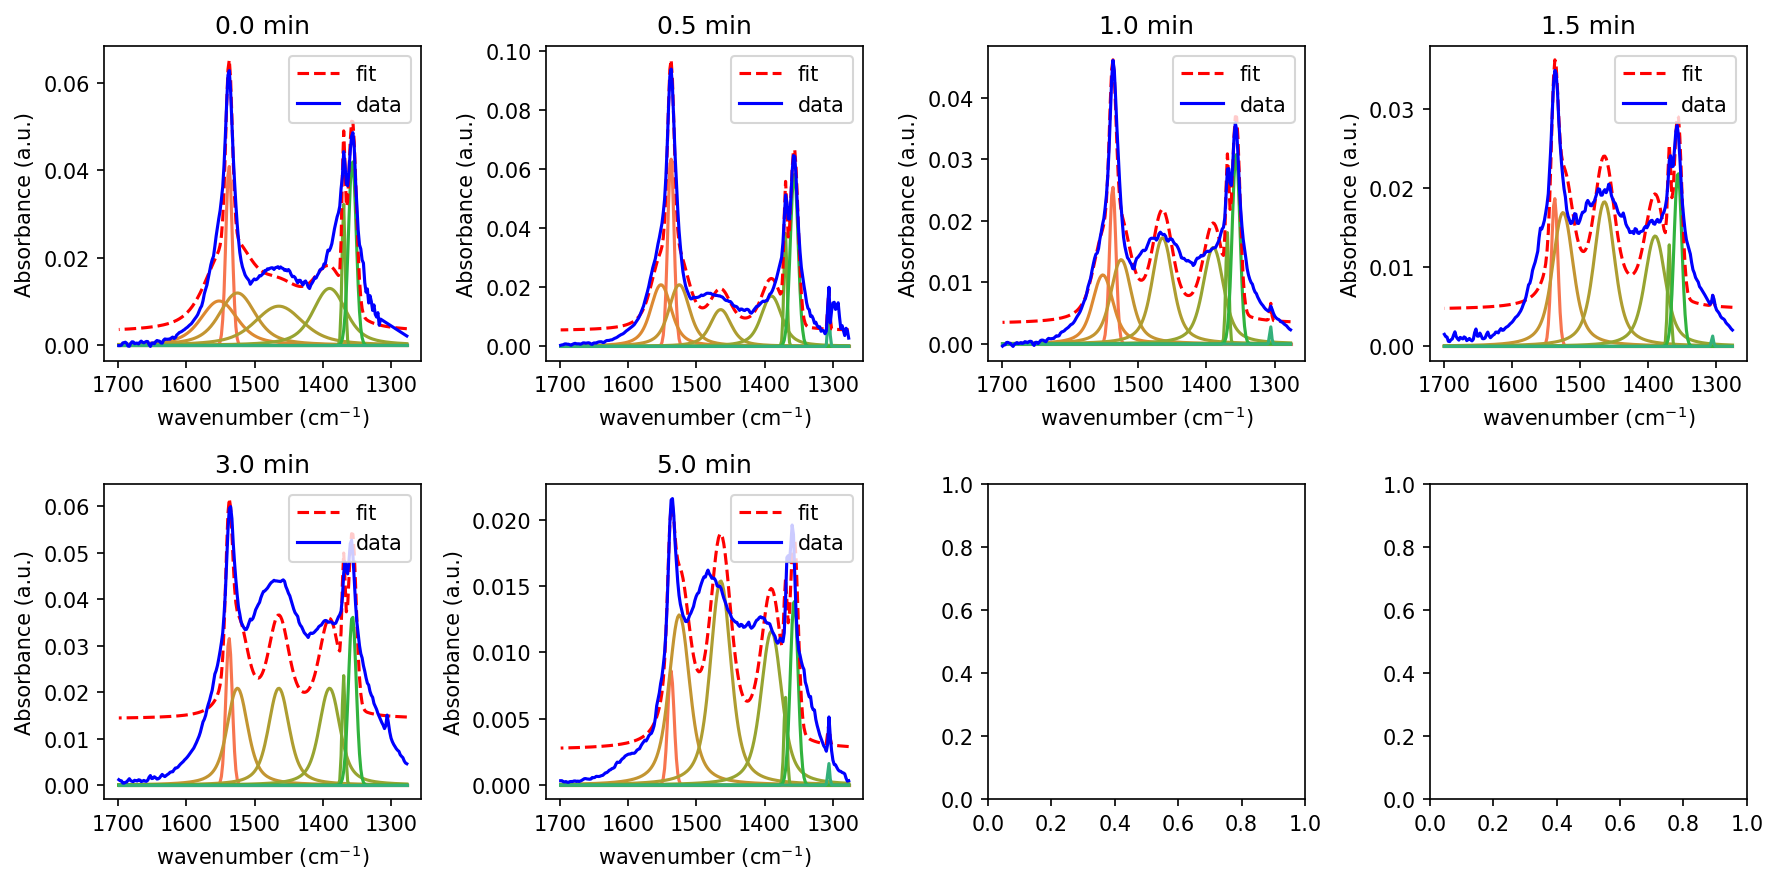

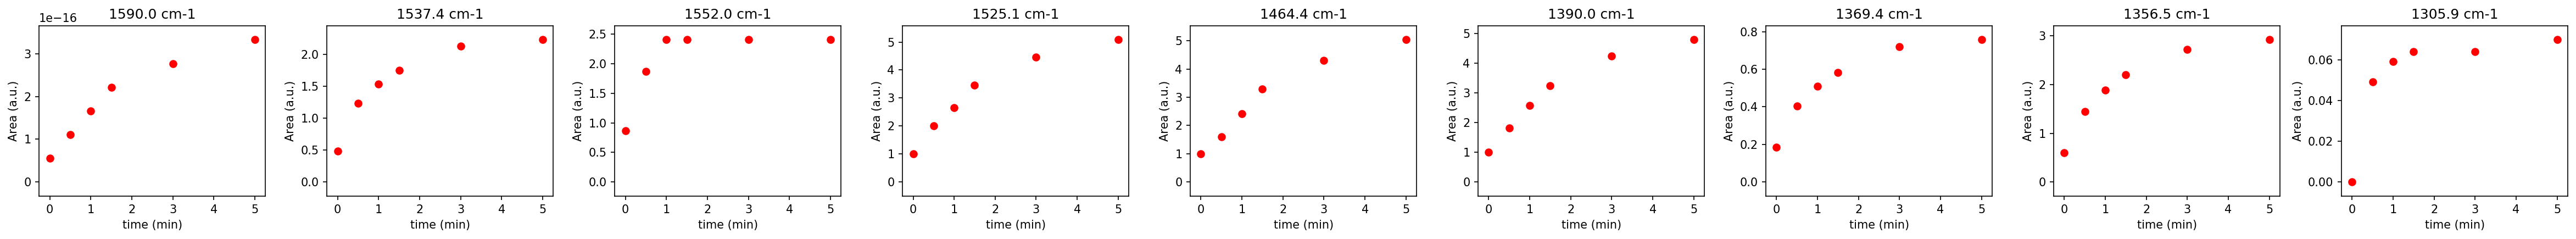

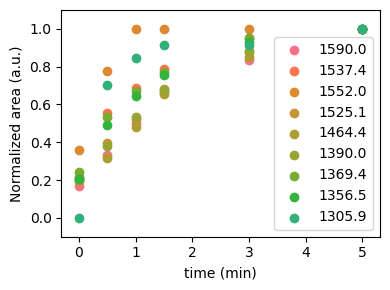

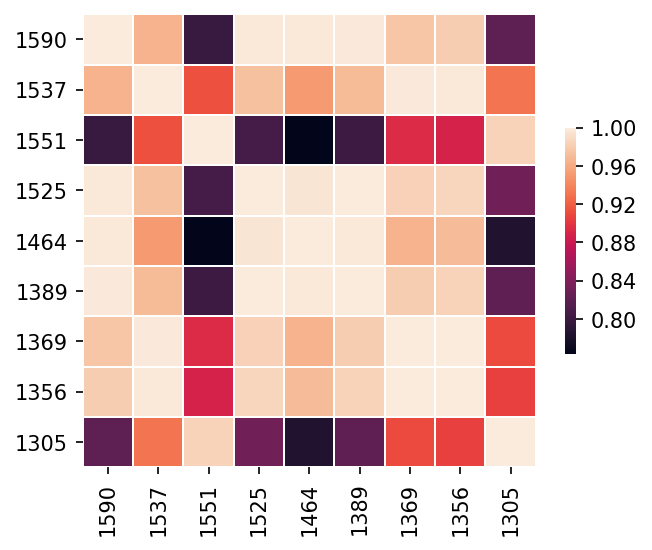

{'Peak Pos': [1590, 1537, 1551, 1525, 1464, 1389, 1369, 1356, 1305],
 'Amps': array([[5.55111512e-17, 4.84023191e-01, 8.66029130e-01, 9.99999663e-01,
         1.00000000e+00, 1.00000000e+00, 1.85320809e-01, 6.03007639e-01,
         5.55111512e-17],
        [1.11022302e-16, 1.23449147e+00, 1.86602913e+00, 1.99999966e+00,
         1.59695971e+00, 1.81754624e+00, 4.05281759e-01, 1.44158478e+00,
         4.92238670e-02],
        [1.66533454e-16, 1.53614256e+00, 2.40416413e+00, 2.65725216e+00,
         2.42429247e+00, 2.56964168e+00, 5.09532602e-01, 1.88503713e+00,
         5.93072675e-02],
        [2.22044605e-16, 1.75723498e+00, 2.40416413e+00, 3.46741447e+00,
         3.29964159e+00, 3.23789182e+00, 5.83379308e-01, 2.19887596e+00,
         6.40247674e-02],
        [2.77555756e-16, 2.13113383e+00, 2.40416413e+00, 4.46741447e+00,
         4.29964156e+00, 4.23789182e+00, 7.19152344e-01, 2.71905799e+00,
         6.40247674e-02],
        [3.33066907e-16, 2.23308970e+00, 2.40416413e+00, 5.0819

In [92]:
params_IG = result.params
Plot_data_IG(params_IG,x_CC,y_CC[:ndata],Vec_IG_CC0,Time[:ndata],True)

Now we want to creat a frame of the vector space, i.e. we need to define how many vectors are there and which peaks belong to which vector.

In [168]:
ndata = 6
Vec_IG_struc_CC = {'Peaks':np.array([[0],[1,2],[3,4,5],[6,7],[8]]),
                   'Types':np.array([[1],[0,1],[1,1,1],[0,0],[0]])}
Vec_fit_CC0 = Generate_Vec_IG(params_IG,Vec_IG_struc_CC,ndata)

#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
#                           'Specs':np.array([[0.1,0.1,0.1,0.1],
#                                            [4000,4000,4000,4000],
#                                            [0.1,.1,0.1,0.1],
#                                            [6.5,6.5,6.5,6.5]])}


In [169]:
t0 = time.time()

#Vec_fit_CC0['Vec3']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[0,0],[4000,4000],[1.2,1.2],[4,4],[-10,-10]])}

Vec_fit_CC0['Alphas'] = None
Vec_fit_CC0['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[4000],[0.1],[20],[0]]),
                               'Pos':[True]}
fit_params_CC0 = Generate_params(x_CC,Vec_fit_CC0,ndata =ndata)
fitter = Minimizer(loss_func, fit_params_CC0, fcn_args=(x_CC, y_CC[:ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 11.417721993020006 0.1 20.0
0 1590.0 1560.0 1620.0
1 4.7124999999999675 0.1 9.712499999999967
1 1537.3744588742065 1532.3744588742065 1542.3744588742065
1 17.8 2.8000000000000007 32.8
1 1551.9509250504263 1521.9509250504263 1581.9509250504263
2 17.41990664739818 2.4199066473981787 32.41990664739818
2 1525.0699447883264 1495.0699447883264 1555.0699447883264
2 23.26999999999804 8.269999999998038 38.269999999998035
2 1464.3705564845527 1434.3705564845527 1494.3705564845527
2 16.03000000003715 1.0300000000371483 31.03000000003715
2 1389.95284157583 1359.95284157583 1419.95284157583
3 2.2931999999999992 0.1 7.293199999999999
3 1369.3609423181294 1364.3609423181294 1374.3609423181294
3 5.687499999999999 0.6874999999999991 10.6875
3 1356.535646340729 1351.535646340729 1361.535646340729
4 1.400000000000005 0.1 6.400000000000005
4 1305.9297688847644 1300.9297688847644 1310.9297688847644
The time cost is: 930.5799040794373


In [170]:
new_params_CC0 = result.params

The R2 score of the fit is: 0.98
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0  5.551115e-16    2.071550   3.929637  0.694191  0.001266
1  1.110223e-15    5.434042   7.285640  1.736447  0.143602
2  1.665335e-15    6.949976  10.751612  2.148576  0.165120
3  2.220446e-15    8.109243  14.609542  2.368797  0.179131
4  2.775558e-15    9.924627  23.416297  2.641586  0.211037
5  3.330669e-15   10.527096  26.450187  2.720735  0.192785

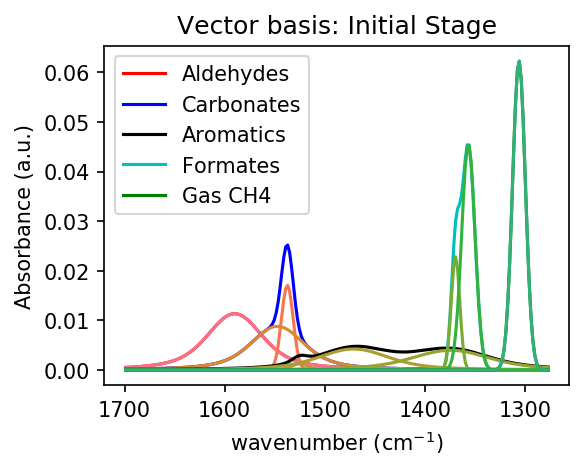

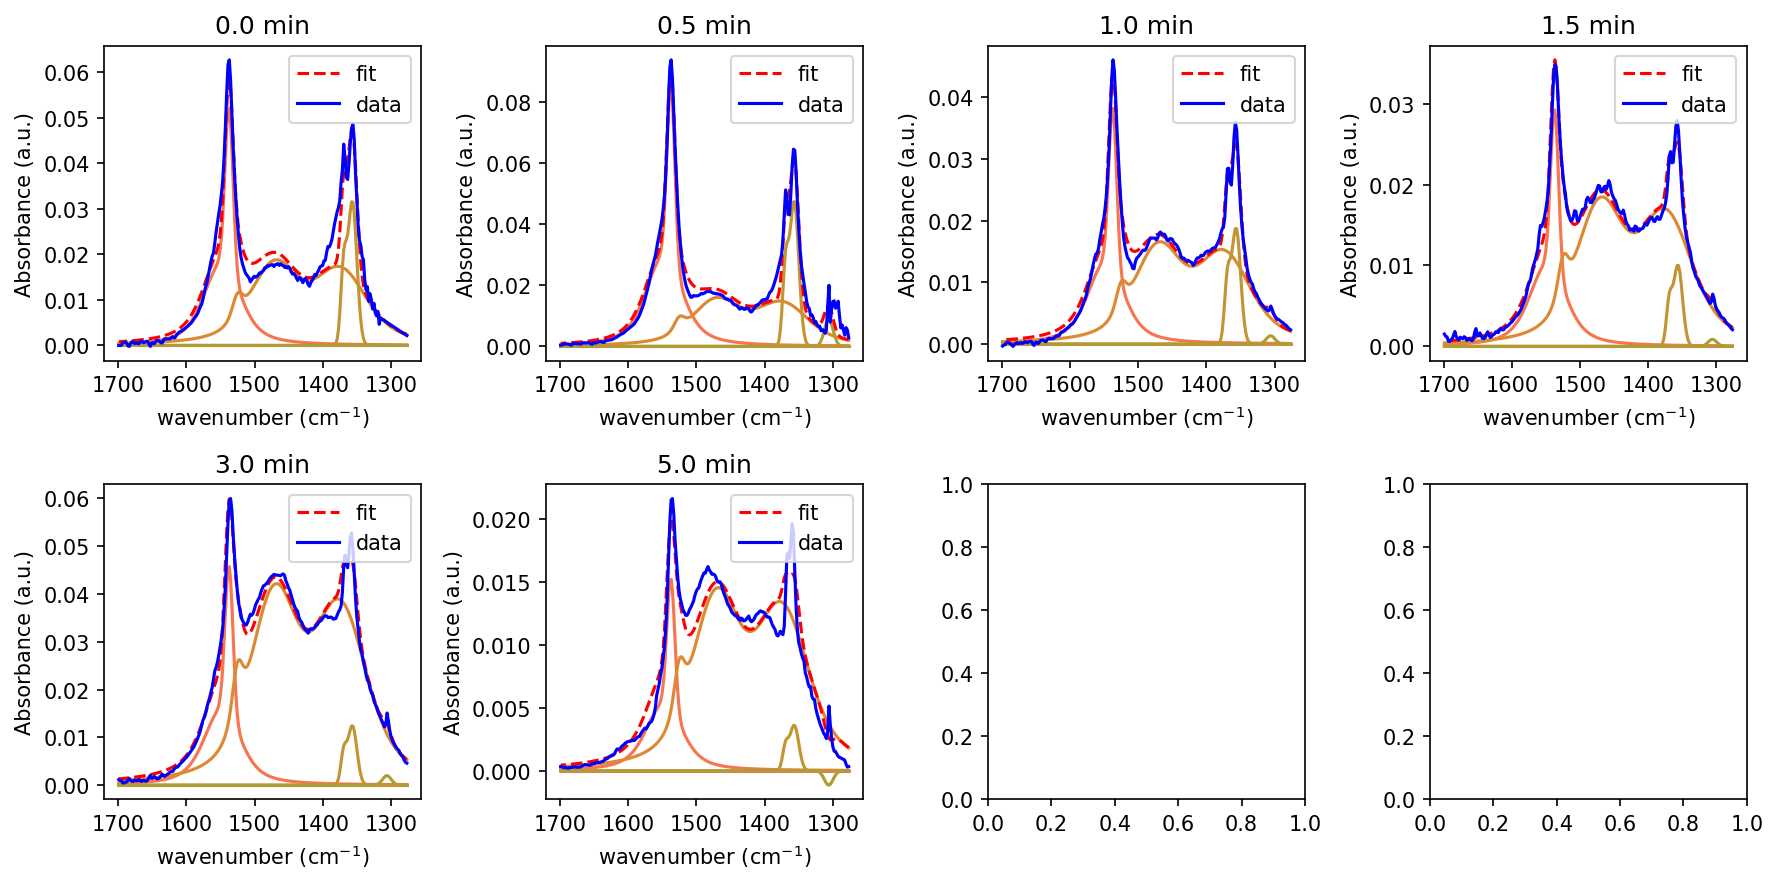

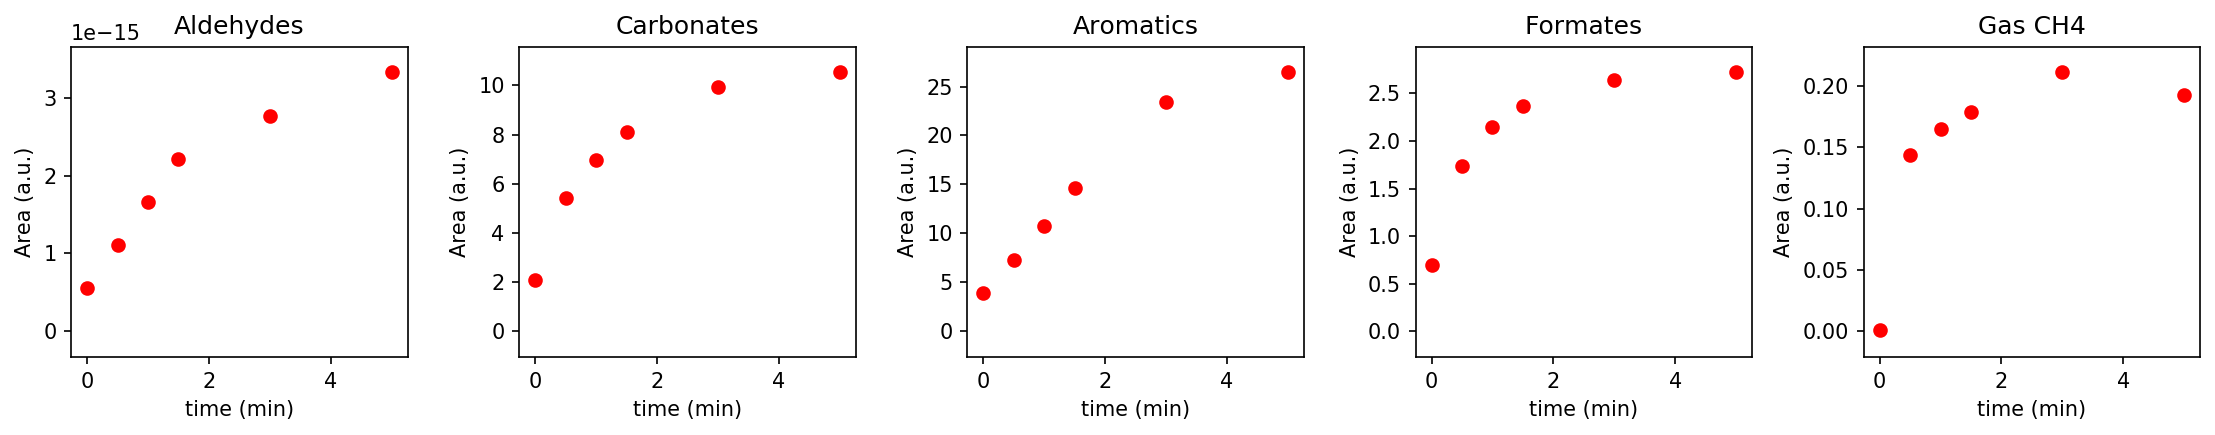

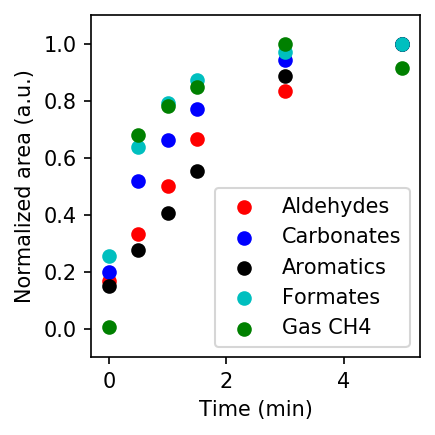

In [171]:
Vec_name_CC0 = np.array(['Aldehydes','Carbonates','Aromatics','Formates','Gas CH4'])
yhat_CC0 = Generate_data(new_params_CC0,x_CC,Vec_fit_CC0,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CC[:ndata].flatten(), yhat_CC0.flatten())))

Plot_data(new_params_CC0,x_CC,y_CC[:ndata],Vec_fit_CC0,Time[:ndata],Vec_name_CC0,True)

### Fitting the Middle Stage (20,120) min

We use postfix _CC1 for fitting of this period.

Below is an intial guess of the peaks.

In [128]:
Vec_CC_IG1 = {'Mus':np.array([1601.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                     'Mus_max':None}
             }


In [129]:
t0 = time.time()
nstart = 6
ndata = 2

fit_params_IG1 = Generate_params_IG(x_CC,Vec_CC_IG1,ndata = ndata)

fitter = Minimizer(loss_func_IG, fit_params_IG1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_CC_IG1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 83.20467209815979


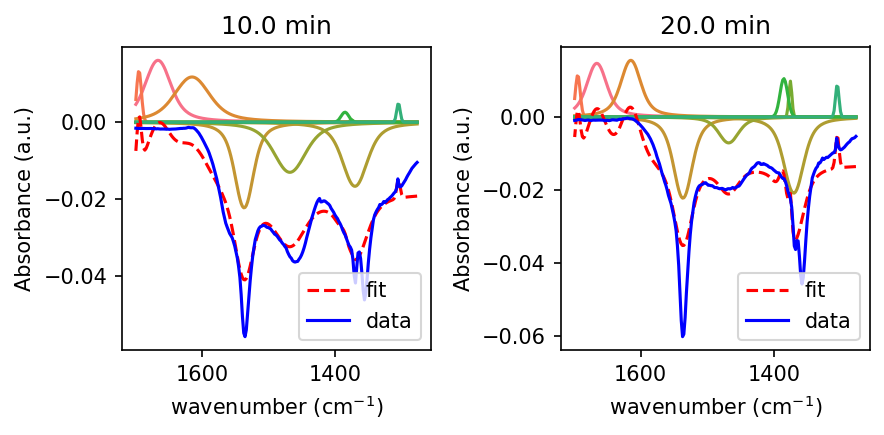

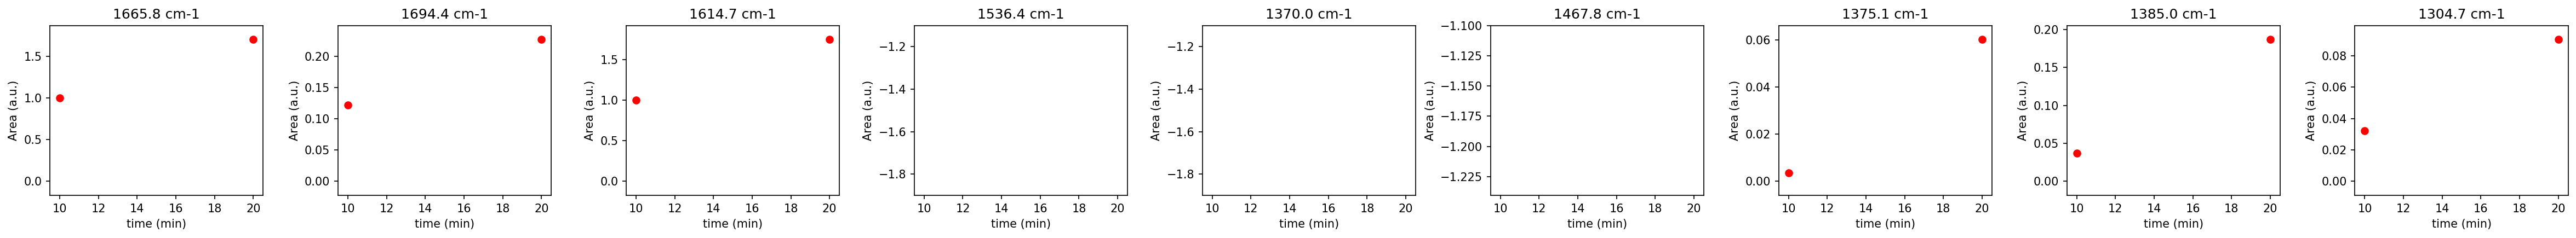

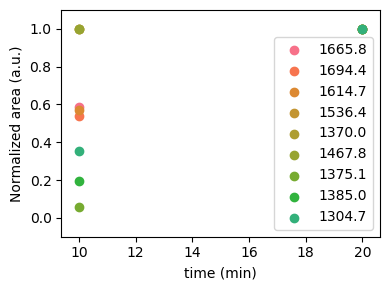

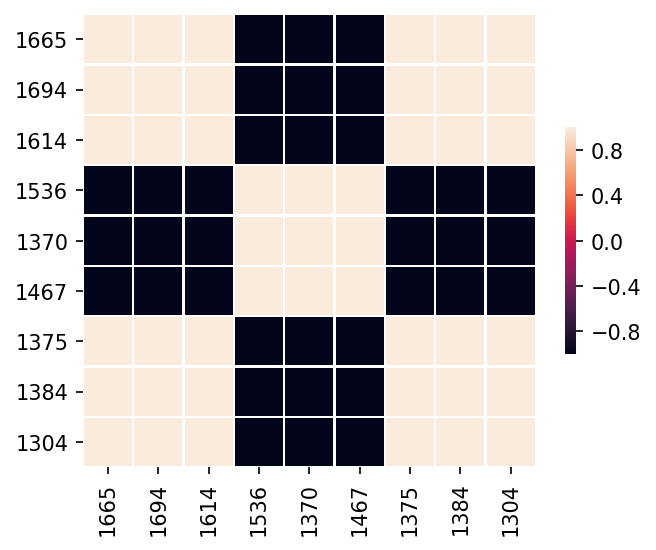

{'Peak Pos': [1665, 1694, 1614, 1536, 1370, 1467, 1375, 1384, 1304],
 'Amps': array([[ 1.        ,  0.12193242,  1.        , -1.        , -1.        ,
         -1.        ,  0.0035426 ,  0.03687979,  0.03210905],
        [ 1.70465141,  0.22663058,  1.74418469, -2.        , -2.        ,
         -1.34052604,  0.06004145,  0.18689708,  0.09027386]])}

In [130]:
params_IG1 = result.params
Plot_data_IG(params_IG1,x_CC,y_CC[nstart:nstart+ndata],Vec_CC_IG1,Time[nstart:nstart+ndata],True)

In [150]:
nstart = 6
ndata = 2

Vec_fit_CC1 = Generate_Vec_IG(params_IG1,Vec_IG_struc_CC,ndata)

In [165]:
t0 = time.time()
Vec_fit_CC1['Alphas'] = None

Vec_fit_CC1['Vec0']['Mus'][0]=1605.
Vec_fit_CC1['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1595],[1610],[0.1],[20],[-1]]),
                               'Pos':None}
Vec_fit_CC1['Vec1']['Mus'][0]=1540.
Vec_fit_CC1['Vec1']['Sigmas'][0] = 4.7
Vec_fit_CC1['Vec1']['Mus'][1]=1570.
Vec_fit_CC1['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1520,1550],[1570,1580],[1.2,1.2],[8.,10.],[-1,-1]]),
                               'Pos':None}
Vec_fit_CC1['Vec2']['Mus'][0] = 1445.
Vec_fit_CC1['Vec2']['Sigmas'][0] = 20.
Vec_fit_CC1['Vec2']['Mus'][1] = 1415.
Vec_fit_CC1['Vec2']['Mus'][2] = 1340.
Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1440,1390,1300],
                                                 [1480,1430,1400],
                                                 [12,5,5.],
                                                 [25,20,25],
                                                 [-1,-1,-1]]),
                                'Pos':None}
Vec_fit_CC1['Vec3']['Mus'] = np.array([1361,1370])
Vec_fit_CC1['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1348,1360],[1362,1375],[0.5,0.5],[2.5,2.5],[-1,-1]]),
                               'Pos':None}

Vec_fit_CC1['Vec4']['Mus'] = np.array([1305])
Vec_fit_CC1['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1300],[1310],[0.1],[4.5],[-10]]),
                               'Pos':None}
fit_params_CC1 = Generate_params(x_CC,Vec_fit_CC1,ndata =ndata)

fitter = Minimizer(loss_func, fit_params_CC1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 12.999999999998652 0.1 20.0
0 1605.0 1595.0 1610.0
1 4.7 1.2 6.5
1 1540.0 1535.0 1545.0
1 17.8 2.8000000000000007 10.0
1 1570.0 1550.0 1580.0
2 20.0 12.0 25.0
2 1445.0 1440.0 1475.0
2 12.530000000095278 5.0 20.0
2 1415.0 1390.0 1430.0
2 16.030000000023815 5.0 25.0
2 1340.0 1310.0 1370.0
3 2.2931999999999957 0.5 2.5
3 1361 1356.0 1362.0
3 5.687499999999967 0.6874999999999671 2.5
3 1370 1365.0 1375.0
4 2.599999999999998 0.1 4.5
4 1305 1300.0 1310.0
The time cost is: 20.0141179561615


In [166]:
new_params_CC1 = result.params

The R2 score of the fit is: 0.92
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0   1.509880   -1.426551  -2.703766 -0.123831 -0.025156
1   2.045531   -3.147489  -5.743391 -0.325051 -0.068167

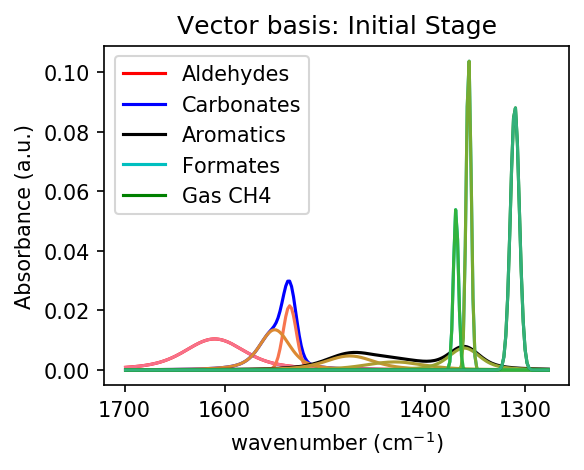

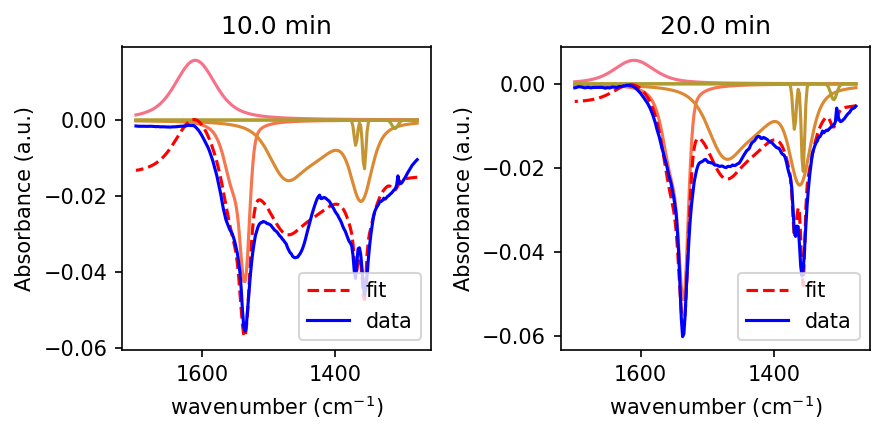

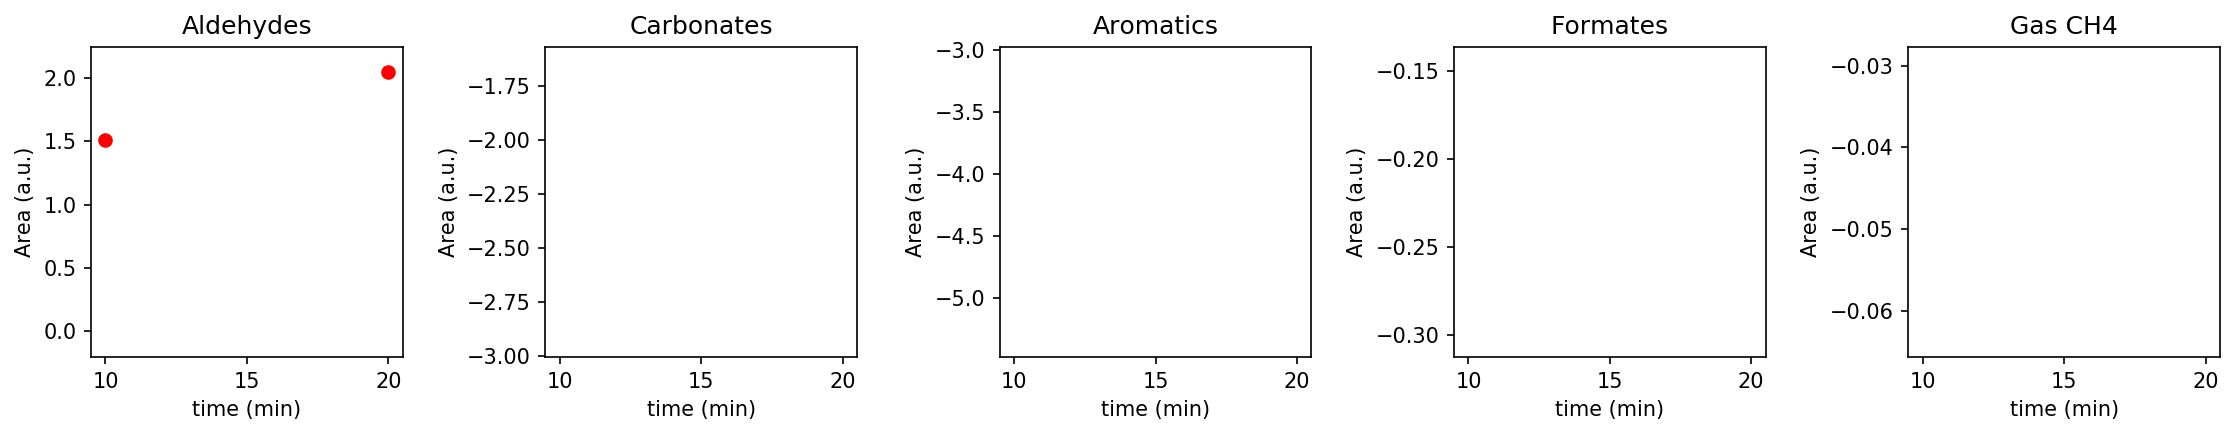

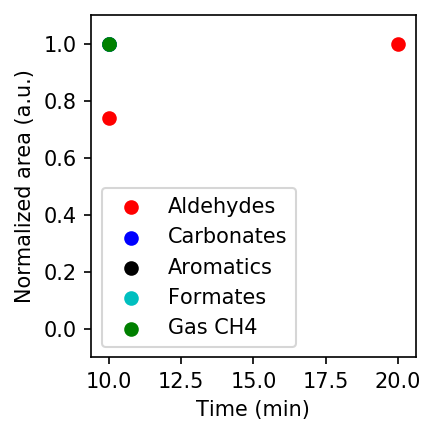

In [167]:
yhat_CC1 = Generate_data(new_params_CC1,x_CC,Vec_fit_CC1,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC1.flatten())))
Plot_data(new_params_CC1,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC1,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Fitting the Final Stage (180,720) min

We use postfix _CC2 for fitting of this period.

Below is an intial guess of the peaks.

In [174]:
Vec_IG_CC2 = {'Mus':np.array([1600, 1537.8, 1541.7, 1473.6, 1386, 1352, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,18.7, 20, 18, 8.7, 2.4, 4, 2.37]),
             'Types':np.array([0,1,0,0,0,0,1,1,1]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                     'Mus_max':None}
             }


In [175]:
t0 = time.time()
nstart = 10
ndata = 9
fit_params_IG2 = Generate_params_IG(x_CC,Vec_IG_CC2,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_IG_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 569.2882487773895


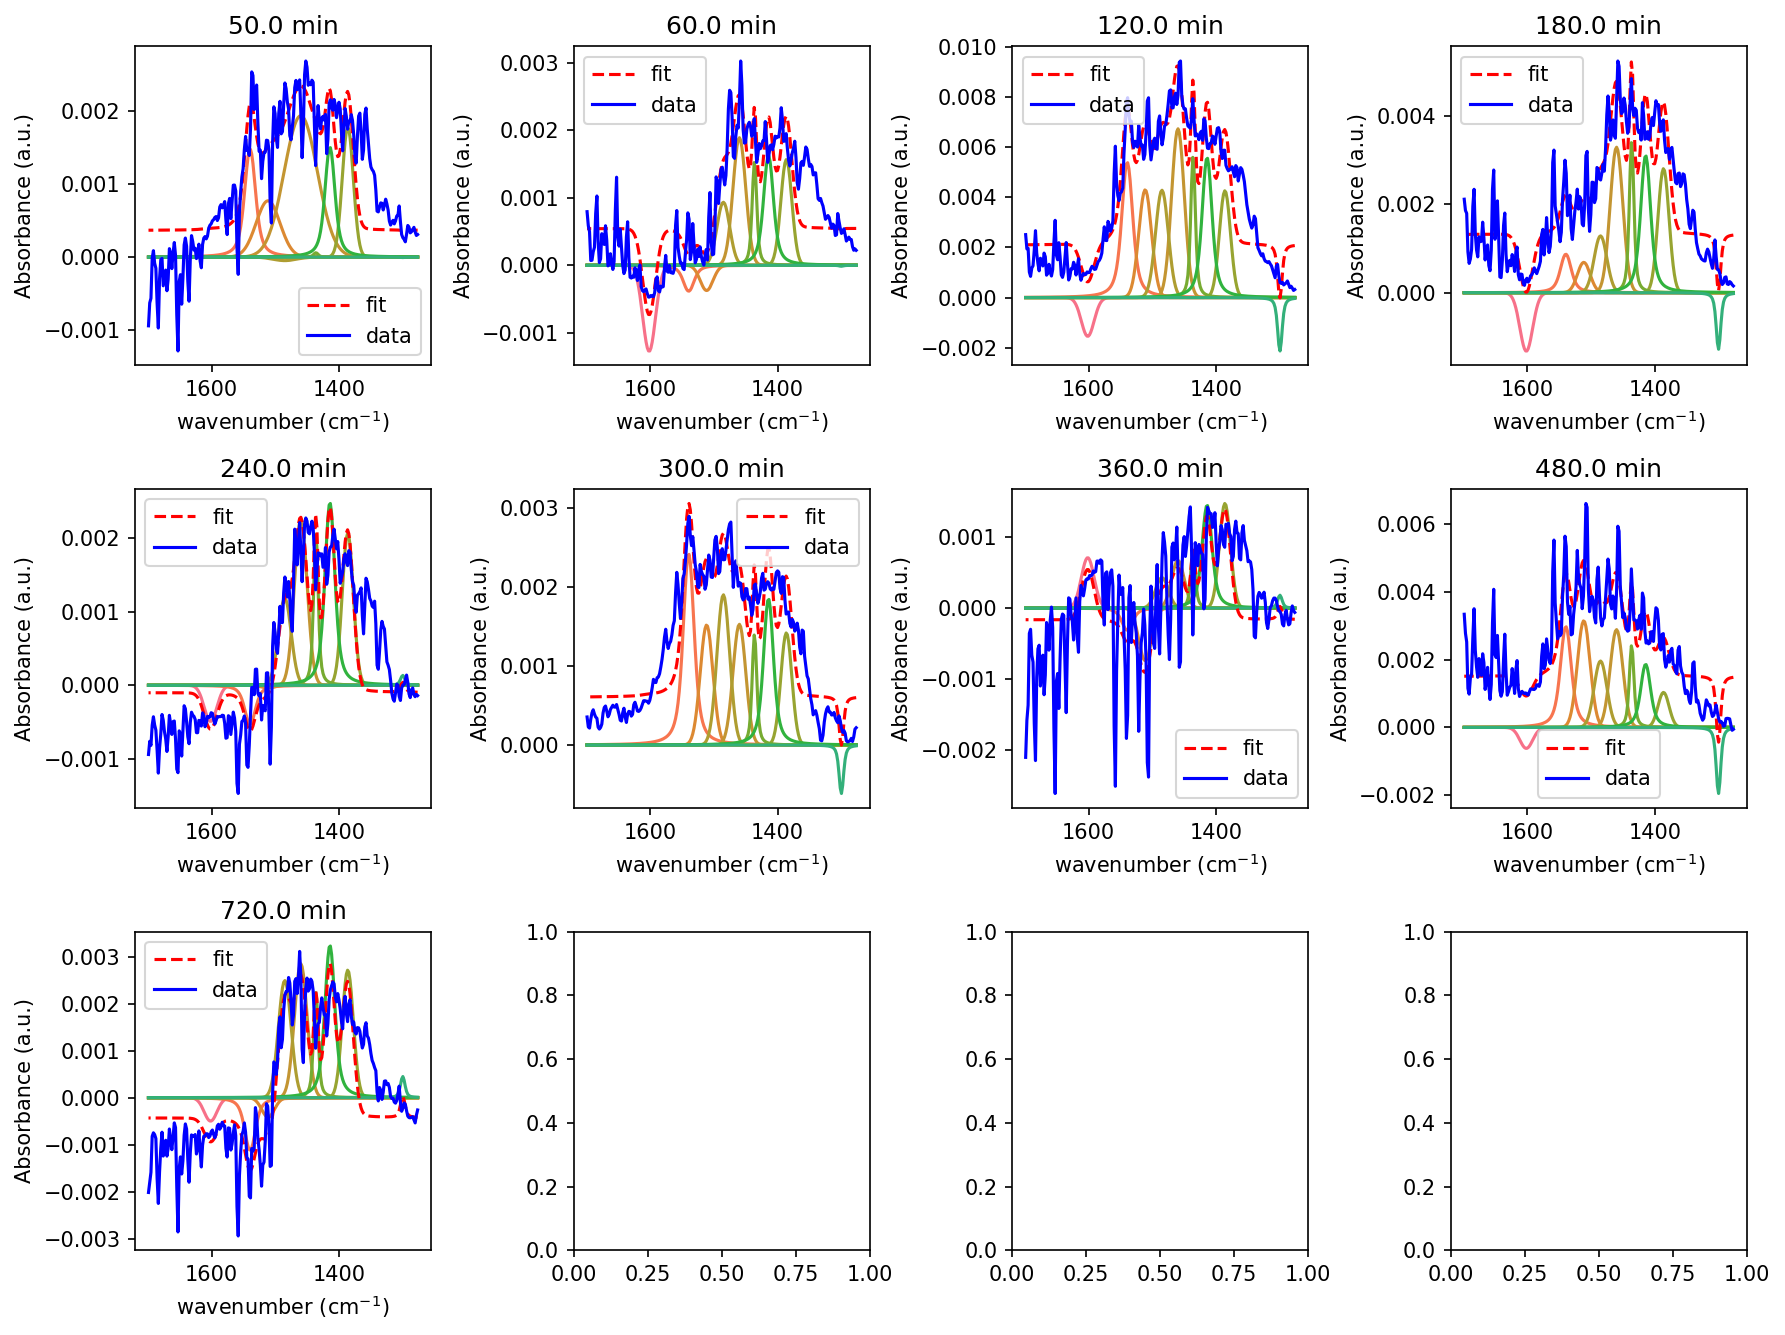

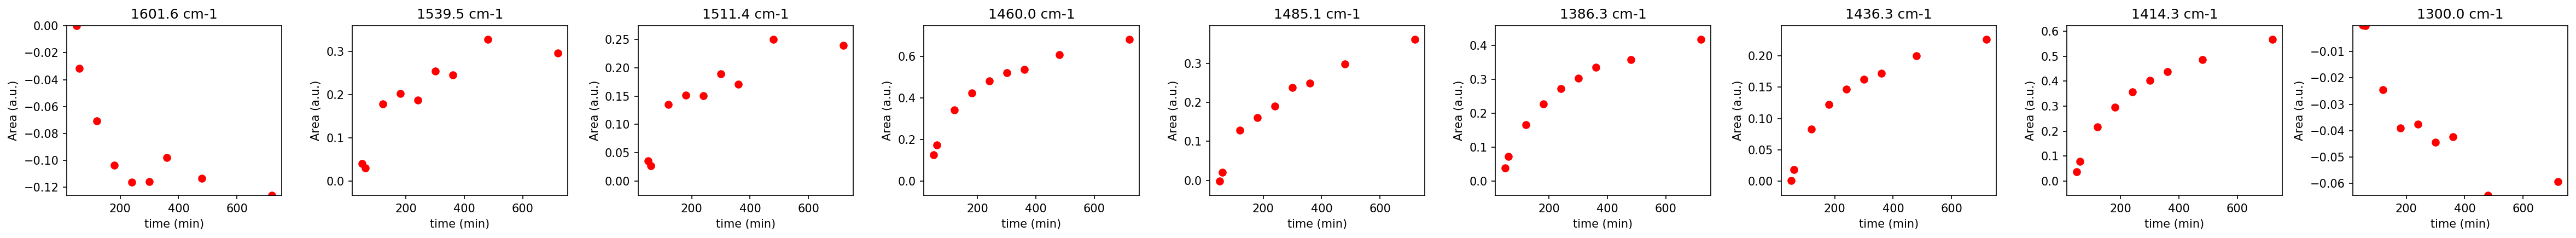

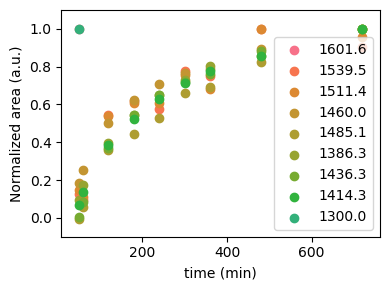

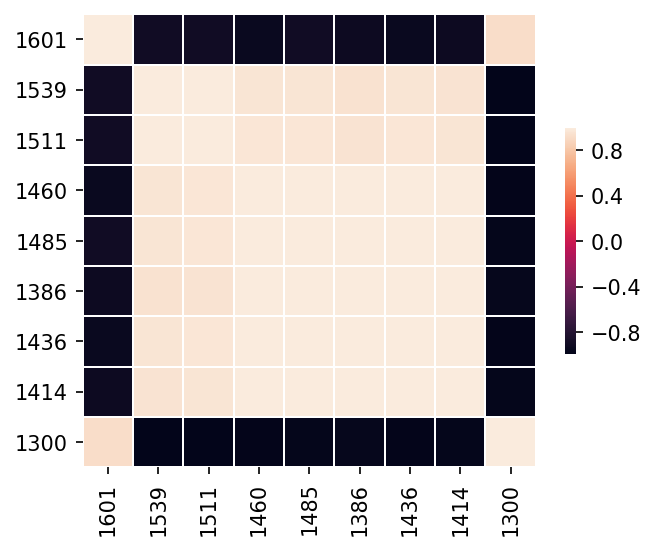

{'Peak Pos': [1601, 1539, 1511, 1460, 1485, 1386, 1436, 1414, 1300],
 'Amps': array([[ 2.80074541e-04,  4.06001669e-02,  3.62492879e-02,
          1.26467569e-01, -2.17449182e-03,  3.88815506e-02,
          6.91520853e-04,  3.76009080e-02, -6.82374555e-05],
        [-3.17153006e-02,  3.00763581e-02,  2.68636839e-02,
          1.73922464e-01,  2.12794784e-02,  7.30870030e-02,
          1.83561958e-02,  7.81269756e-02, -2.26994678e-04],
        [-7.04771970e-02,  1.78006313e-01,  1.34689755e-01,
          3.42773062e-01,  1.28681020e-01,  1.66098699e-01,
          8.32232246e-02,  2.17218363e-01, -2.44635528e-02],
        [-1.03720774e-01,  2.01938176e-01,  1.51939085e-01,
          4.25440106e-01,  1.60984349e-01,  2.27434317e-01,
          1.22637213e-01,  2.94726627e-01, -3.90339905e-02],
        [-1.16008573e-01,  1.87488072e-01,  1.51024489e-01,
          4.81936879e-01,  1.90595634e-01,  2.72435416e-01,
          1.46360920e-01,  3.56464194e-01, -3.75098261e-02],
        [-1.157566

In [177]:
params_IG2 = result.params
Plot_data_IG(params_IG2,x_CC,y_CC[nstart:nstart+ndata],Vec_IG_CC2,Time[nstart:nstart+ndata],True)

In [178]:
Vec_fit_CC2 = Generate_Vec_IG(params_IG2,Vec_IG_struc_CC,ndata)

In [179]:
t0 = time.time()

Vec_fit_CC2['Alphas'] = None
#Vec_fit_CC2['Vec0']['Lims'] = {'Peaks':np.array([0]),'Specs':np.array([[0],[1610],[10],[20],[0]]),'Pos':None}
Vec_fit_CC2['Vec1']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[1500,1410],[1700,1580],[1.2,0.1],[7.5,25],[0,0]]),'Pos':None}
Vec_fit_CC2['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),'Specs':np.array([[0,0,0],[4000,4000,4000],[0.1,0.1,0.1],[20,20,20],[0,0,0]]),'Pos':None}
Vec_fit_CC2['Vec3']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[1355,1355],[1370,1370],[0.1,0.1],[5,5],[-0,0]]),'Pos':None}

fit_params_CC2 = Generate_params(x_CC,Vec_fit_CC2,ndata=ndata)

fitter = Minimizer(loss_func, fit_params_CC2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 11.129999999999999 0.1 26.13
0 1601.5947912379659 1571.5947912379659 1631.5947912379659
1 5.719999999999999 1.2 6.5
1 1539.547459760326 1534.547459760326 1544.547459760326
1 18.7 3.6999999999999993 25.0
1 1511.3934080674326 1481.3934080674326 1541.3934080674326
2 25.99999999999993 10.999999999999929 20.0
2 1460.0 1430.0 1490.0
2 18.0 3.0 20.0
2 1485.1423296315493 1455.1423296315493 1515.1423296315493
2 8.7 0.1 20.0
2 1386.2506076116192 1356.2506076116192 1416.2506076116192
3 2.4 0.1 5.0
3 1436.2943429110958 1431.2943429110958 1370.0
3 5.199999984492036 0.19999998449203638 5.0
3 1414.3021066369731 1409.3021066369731 1370.0
4 2.37 0.1 7.37
4 1300.0000000000005 1295.0000000000005 1305.0000000000005
The time cost is: 4.861058950424194


In [180]:
new_params_CC2 = result.params

The R2 score of the fit is: 0.89
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0  -0.020856    0.027111   0.062358  0.007891 -0.020670
1  -0.031776    0.012520   0.359643  0.007209 -0.017436
2  -0.041350    0.545616   1.209406  0.010479 -0.046193
3  -0.047833    0.637612   1.680670  0.013852 -0.068081
4  -0.052584    0.630649   2.053151  0.017540 -0.062703
5  -0.052456    0.850670   2.274723  0.020557 -0.071697
6  -0.050056    0.796390   2.453256  0.024065 -0.071121
7  -0.046066    1.132219   2.721158  0.025313 -0.101742
8  -0.055630    1.106824   3.214737  0.028081 -0.094206

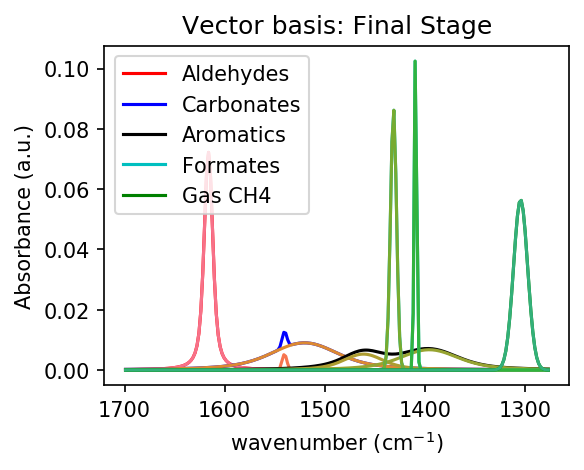

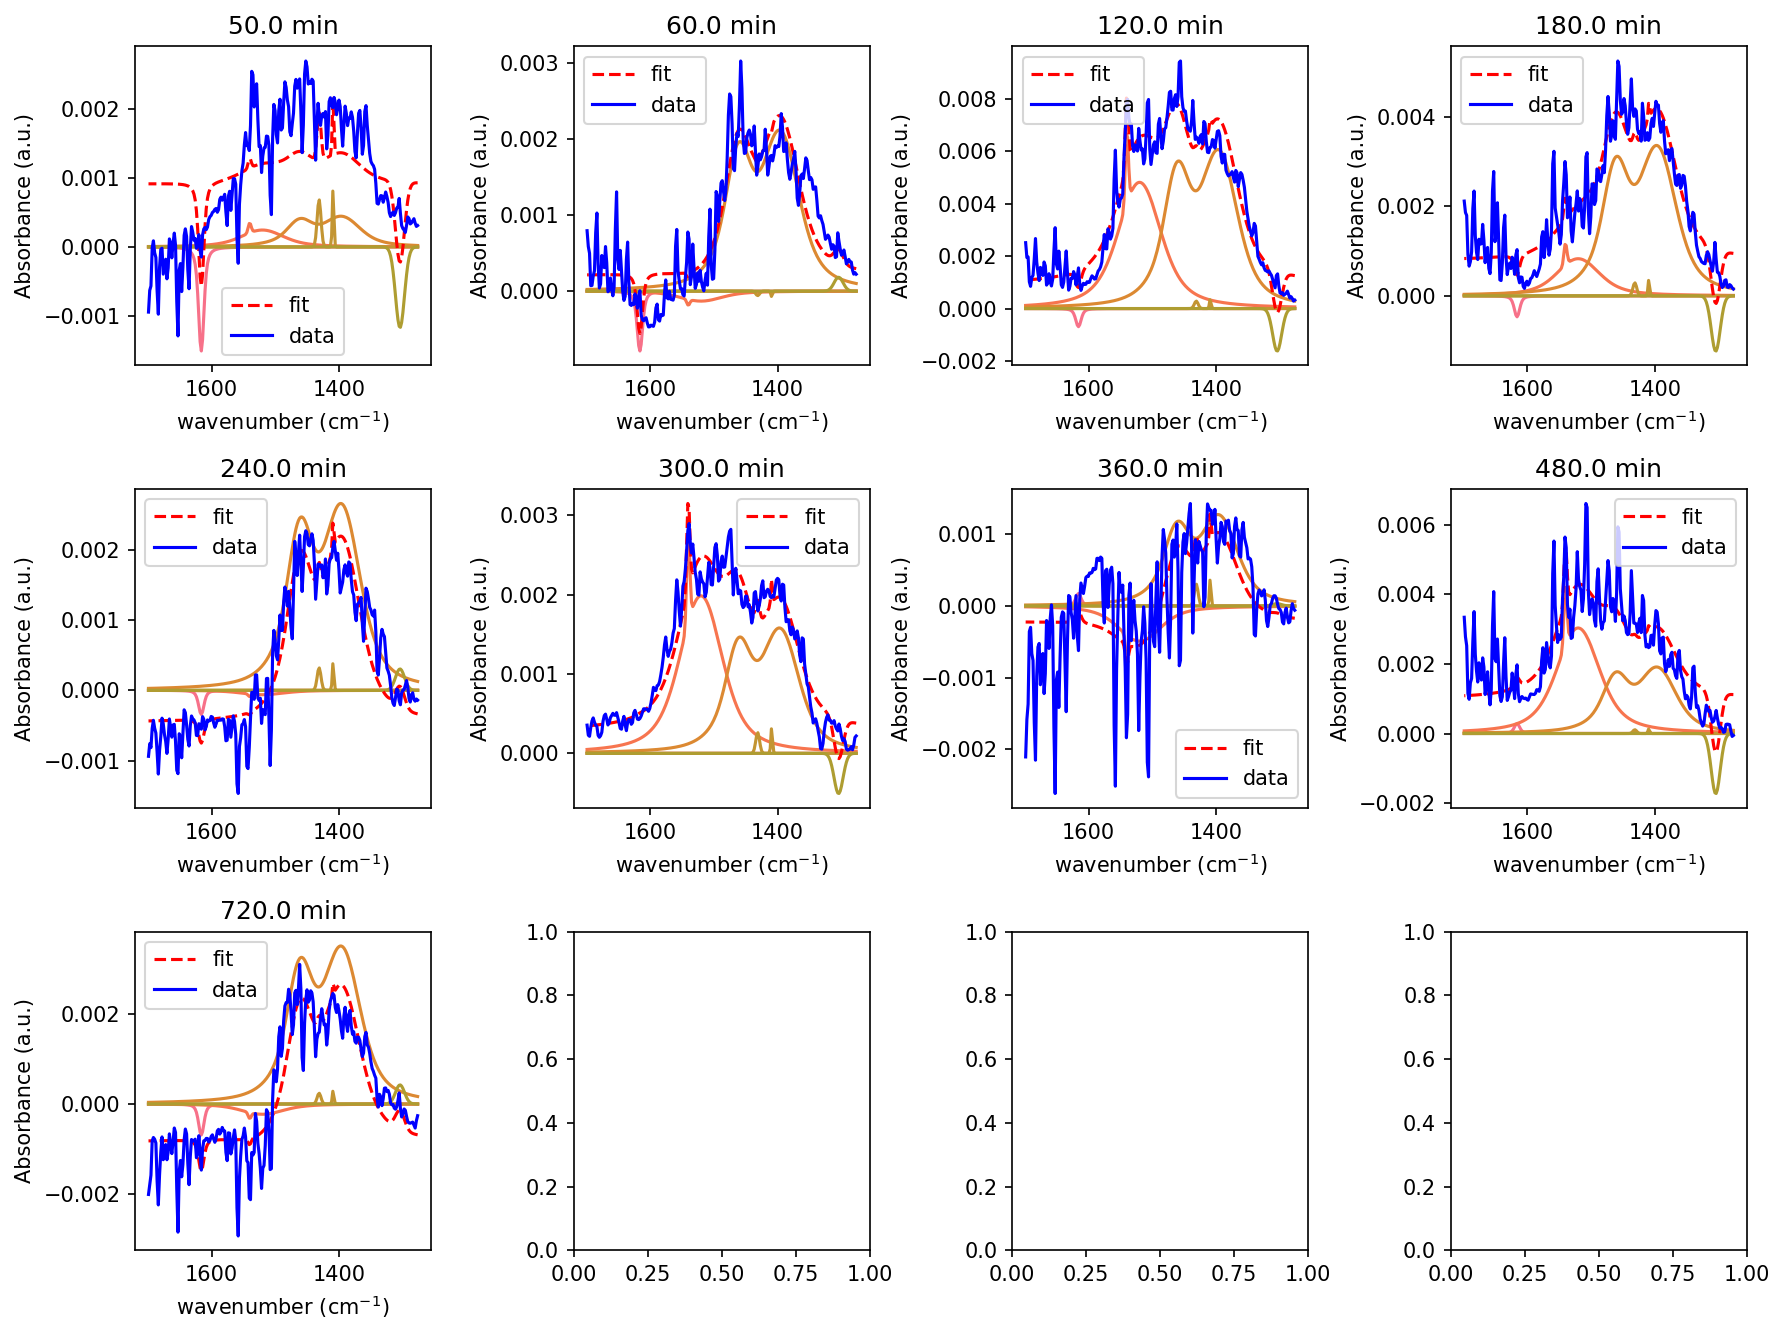

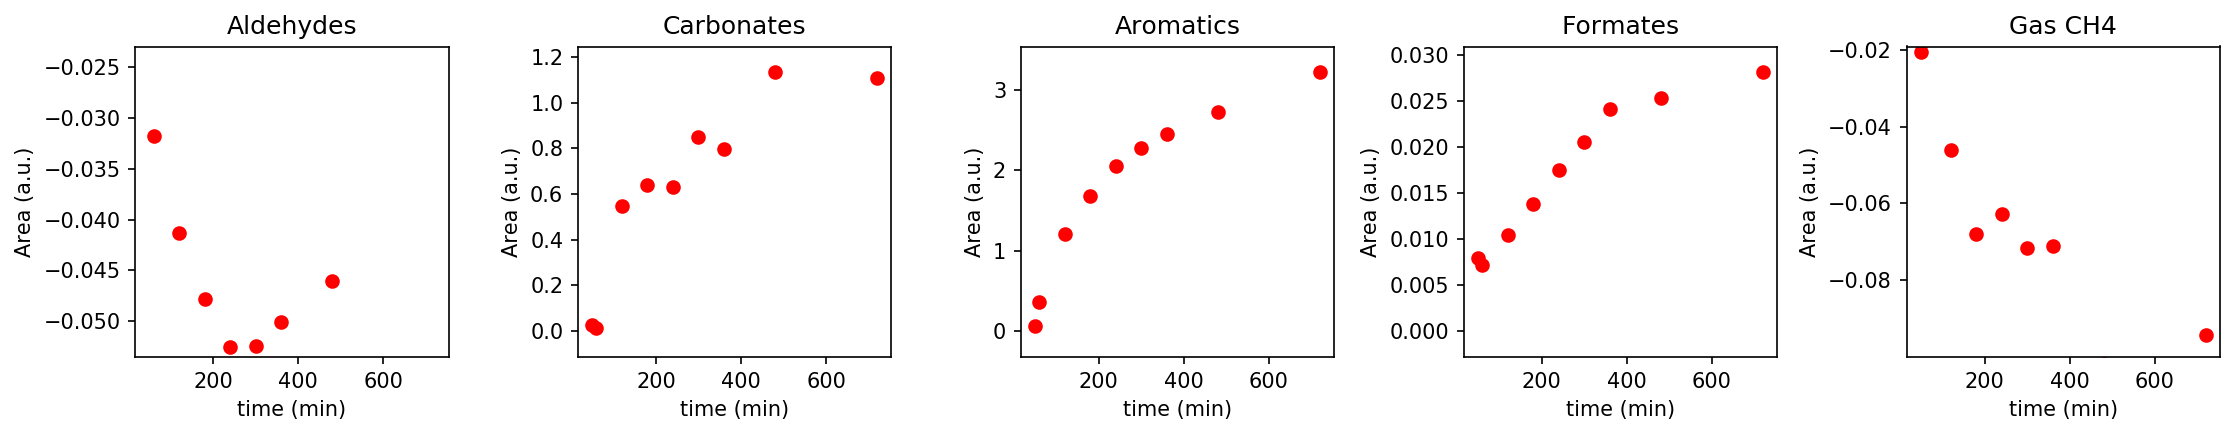

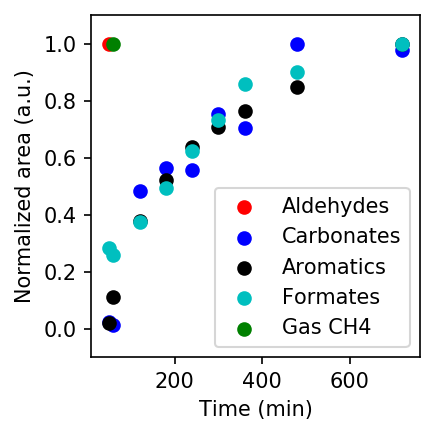

In [181]:
yhat_CC2 = Generate_data(new_params_CC2,x_CC,Vec_fit_CC2,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC2.flatten())))
Plot_data(new_params_CC2,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC2,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Combine the three Stages Together

Now, we want to evaluate the evolution of different species over the entire experiment period through combining the three stages together. 

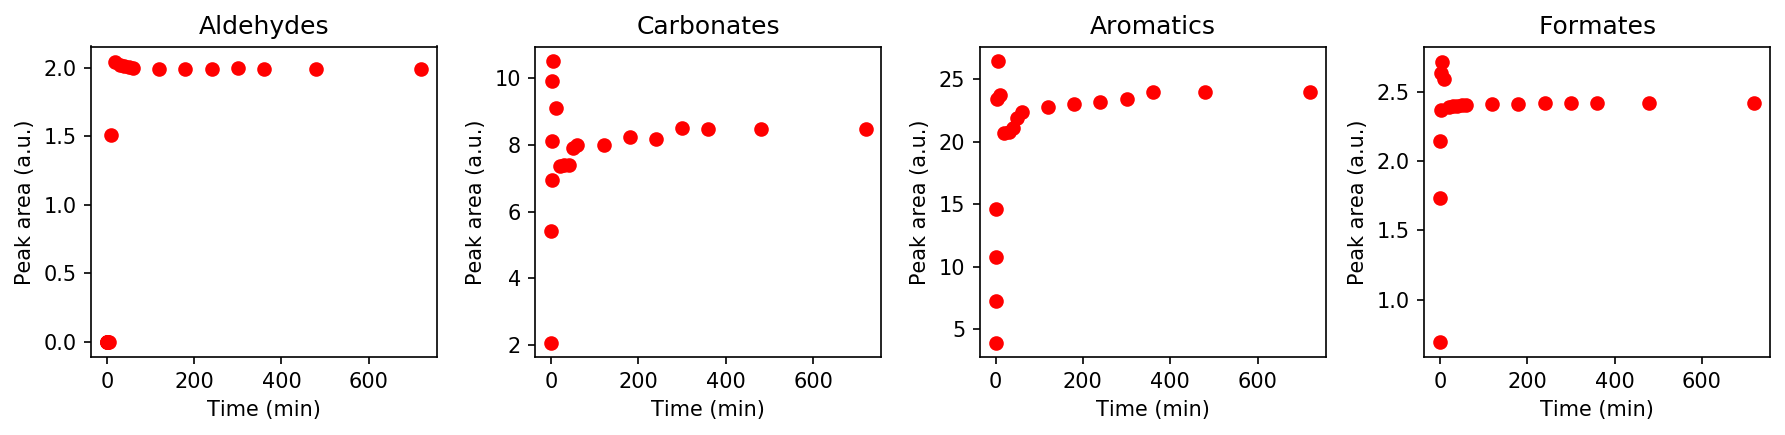

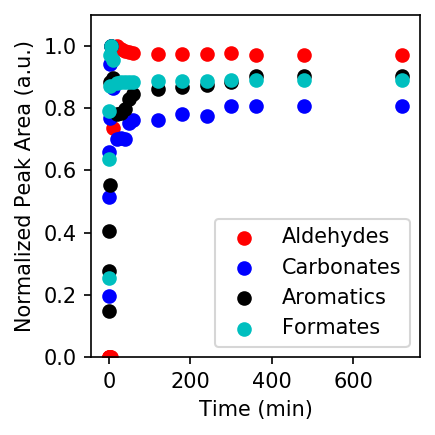

In [246]:
Param_com = {'Params': (new_params_CC0,new_params_CC1,new_params_CC2) ,
            'Lens':np.array([6,2,9])}
Param_com_IG = {'Params': (params_IG,params_IG1,params_IG2) ,
            'Lens':np.array([6,2,9])}

#Plot_com_data_IG(Param_com_IG,Vec_IG_CC0,Time,True)
data_CC = Plot_com_data(Param_com,Vec_IG_struc_CC,Time,Vec_name_CC0,True)

In [184]:
for i in range(3):
    Print_var(Param_com['Params'][i],np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4\t']),Vec_IG_struc_CC)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1590.0		18.4
Carbonates	Gaussian	1537.4		5.8
		Voigt		1547.3		17.8
Aromatics	Voigt		1525.1		5.2
		Voigt		1471.2		23.3
		Voigt		1374.3		26.0
Formates	Gaussian	1369.4		4.2
		Gaussian	1356.5		6.6
Gas CH4		Gaussian	1305.9		6.4
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1610.0		20.0
Carbonates	Gaussian	1535.0		6.5
		Voigt		1550.0		10.0
Aromatics	Voigt		1475.0		16.3
		Voigt		1430.0		20.0
		Voigt		1360.6		10.5
Formates	Gaussian	1356.2		2.5
		Gaussian	1368.9		2.5
Gas CH4		Gaussian	1310.0		4.5
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1616.2		2.9
Carbonates	Gaussian	1540.2		2.4
		Voigt		1520.2		22.4
Aromatics	Voigt		1490.0		20.0
		Voigt		1461.4		13.4
		Voigt		1395.7		19.4
Formates	Gaussian	1431.3		3.0
		Gaussian	1409.3		1.3
Gas CH4		Gaussian	1304.3		7.1


## Fitting the 1000 - 1150 cm$^{-1}$ region

This region contains charistic peaks from C-O speices. 

In [247]:
Vec_IG_CO = {'Mus':np.array([1078.8, 1105.9]),
          'Sigmas':np.array([15.8,7.6]),
          'Types':np.array([0,1]),
          'Lims':None}


In [248]:
t0 = time.time()
fit_params_IG_CO = Generate_params_IG(x_CO,Vec_IG_CO,ndata =19)

fitter = Minimizer(loss_func_IG, fit_params_IG_CO, fcn_args=(x_CO, y_CO, Vec_IG_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 0.6271941661834717


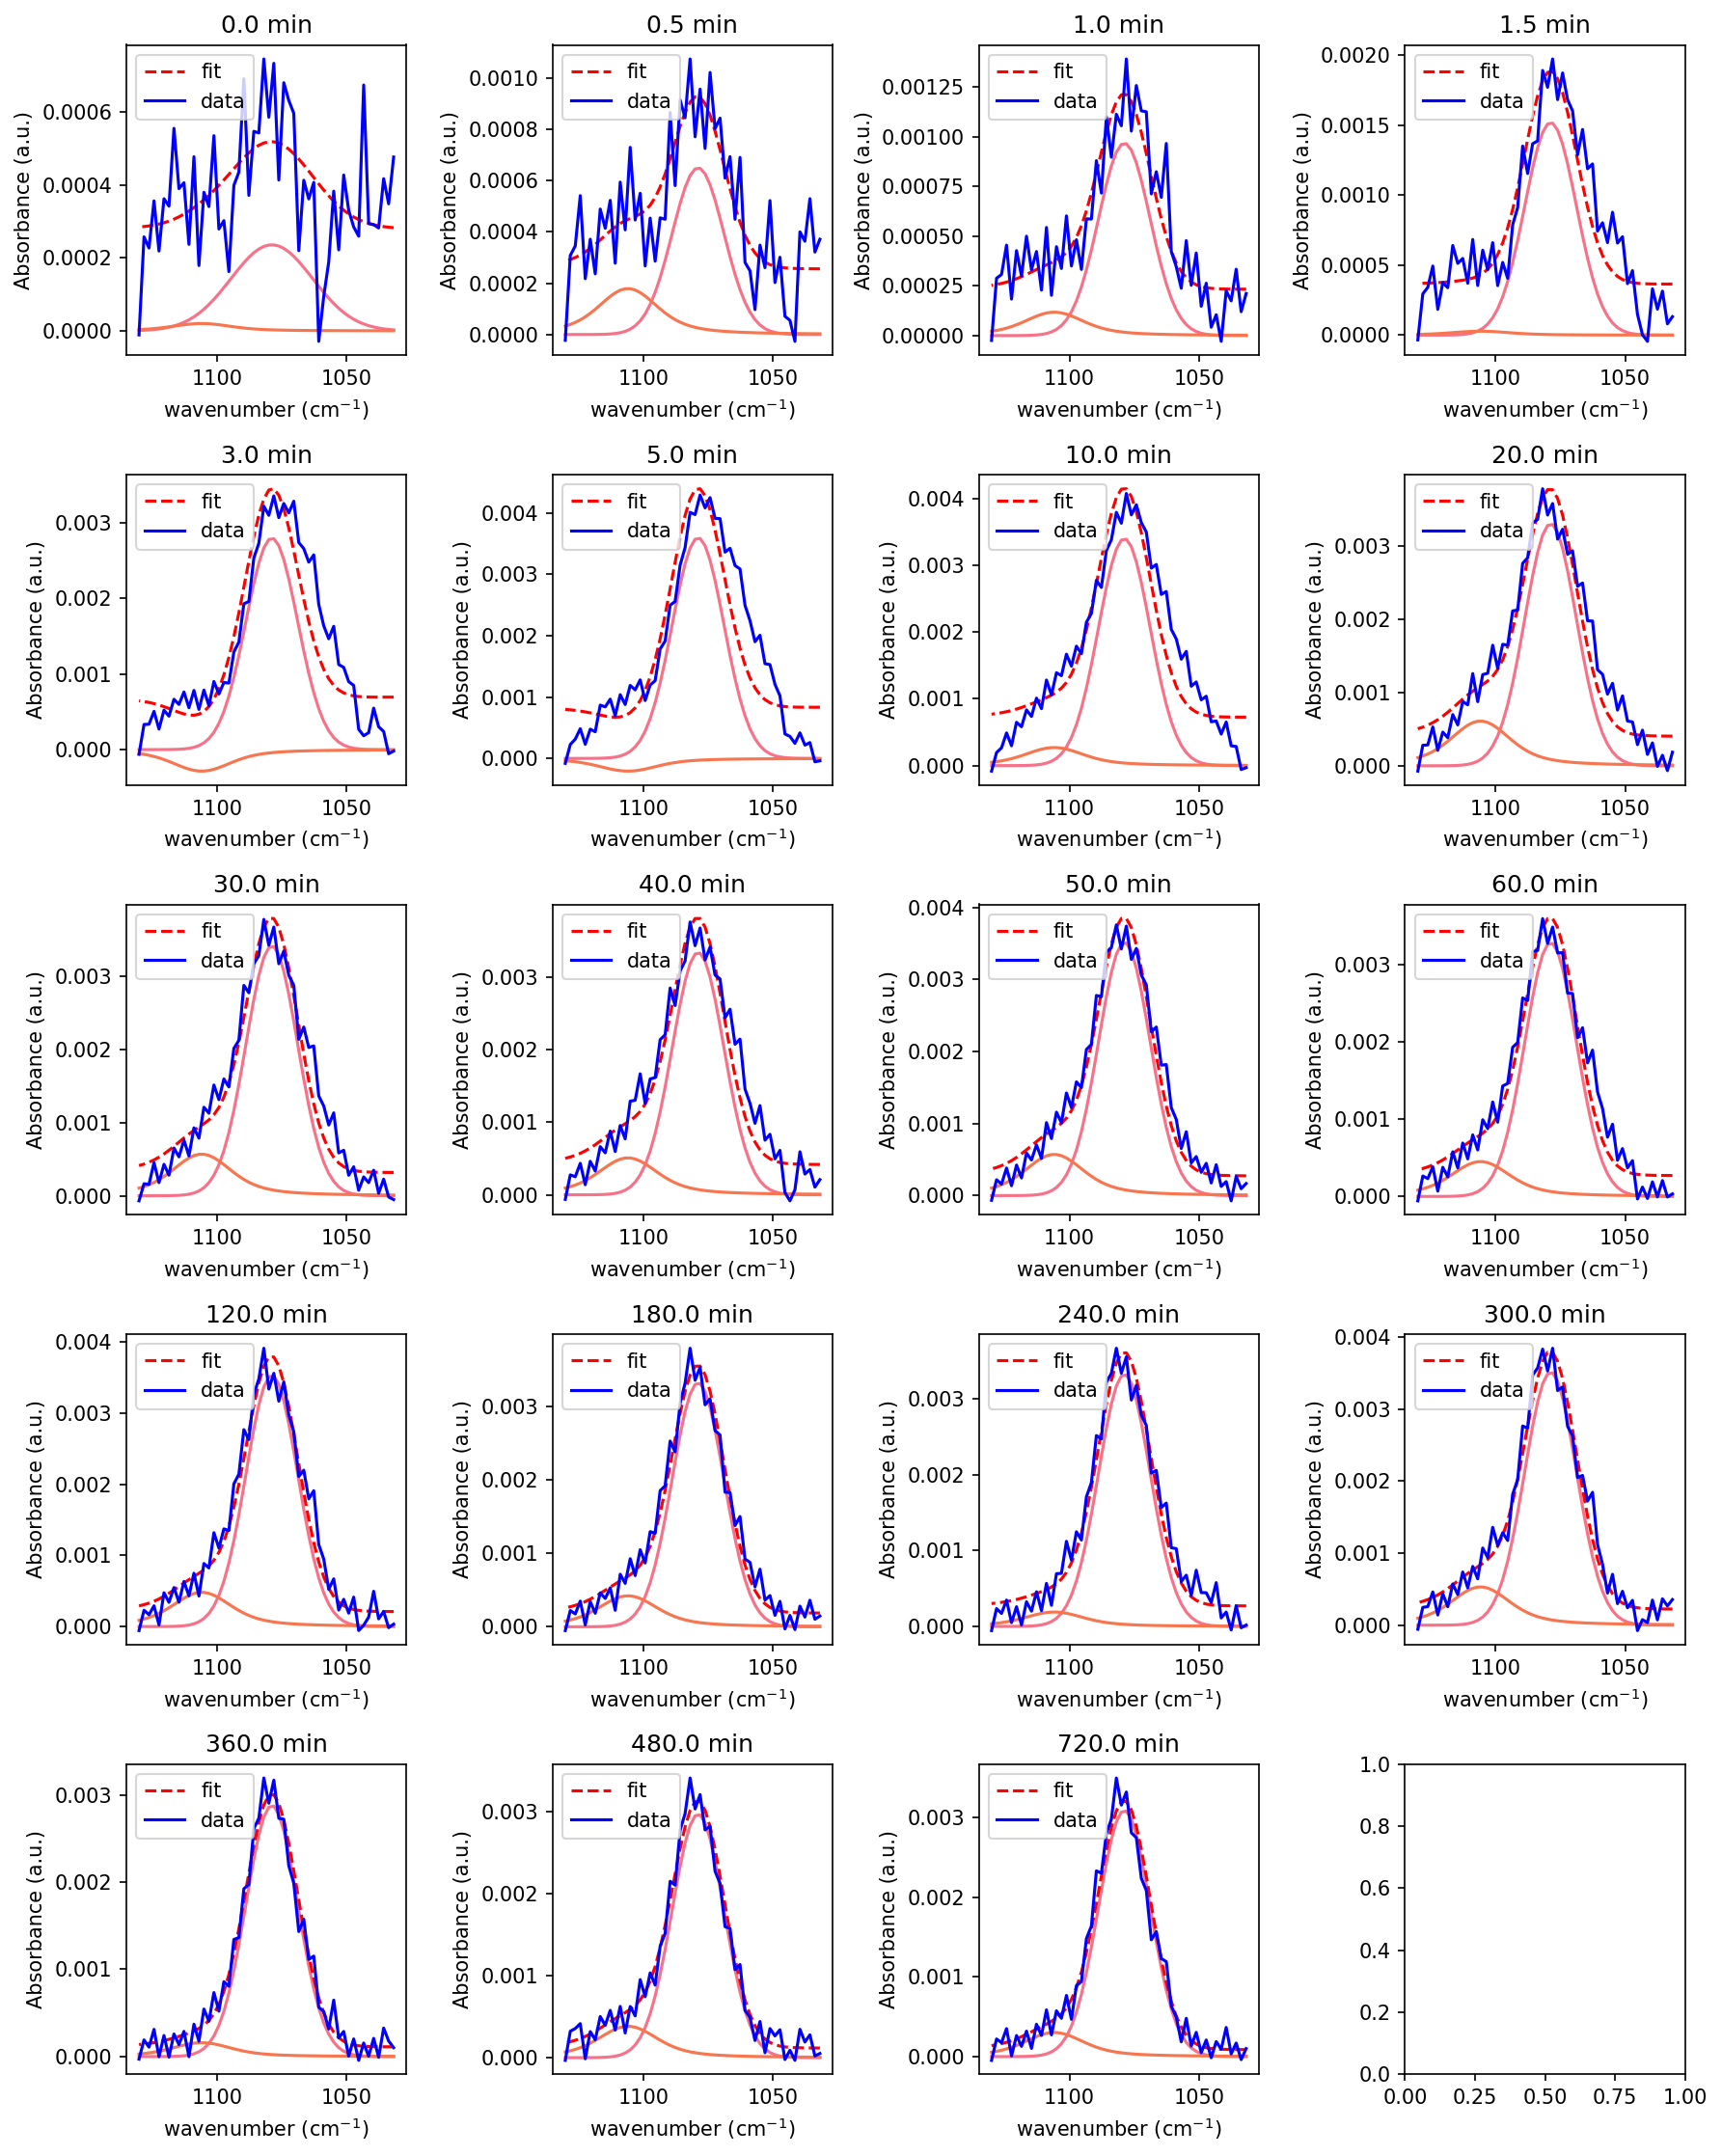

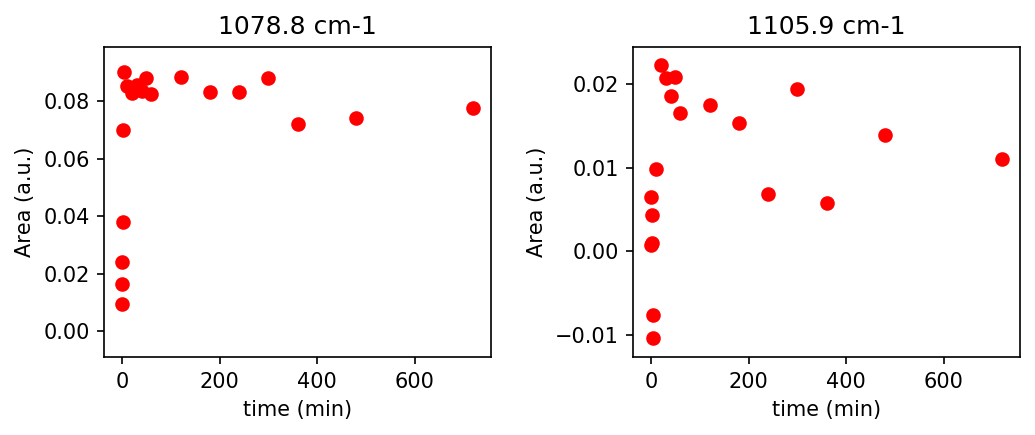

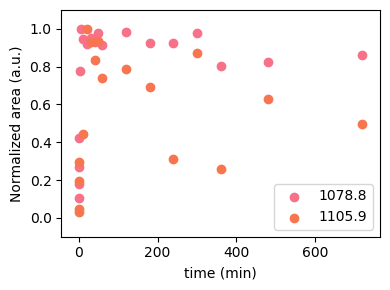

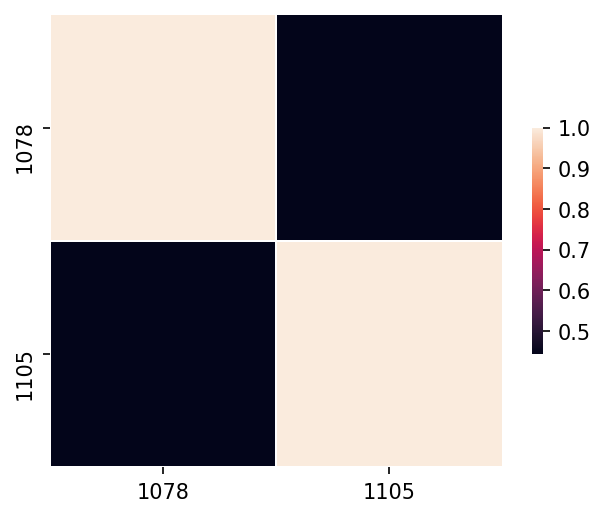

{'Peak Pos': [1078, 1105], 'Amps': array([[ 0.00934926,  0.00073552],
        [ 0.01628755,  0.00652248],
        [ 0.02424907,  0.0042893 ],
        [ 0.03803217,  0.00101984],
        [ 0.07012984, -0.01037892],
        [ 0.09006779, -0.00753825],
        [ 0.08519325,  0.0098423 ],
        [ 0.08273176,  0.02221963],
        [ 0.08571719,  0.02072601],
        [ 0.08361225,  0.01851455],
        [ 0.08812912,  0.02082242],
        [ 0.08242613,  0.01646793],
        [ 0.08848836,  0.01750287],
        [ 0.08315265,  0.01533773],
        [ 0.08324941,  0.00688093],
        [ 0.08811581,  0.019365  ],
        [ 0.07216339,  0.0057901 ],
        [ 0.07433274,  0.01393714],
        [ 0.07752998,  0.01103353]])}

In [249]:
params_IG_CO = result.params
Plot_data_IG(params_IG_CO,x_CO,y_CO,Vec_IG_CO,Time,False)

In [250]:
Vec_IG_struc_CO = {'Peaks':[[0],[1]],'Types':[[0],[1]]}
Vec_fit_CO = Generate_Vec_IG(params_IG_CO,Vec_IG_struc_CO,19)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
 #                          'Specs':np.array([[0.1,0.1,0.1,0.1],
 #                                           [4000,4000,4000,4000],
 #                                           [0.1,.1,0.1,0.1],
  #                                          [6.5,6.5,6.5,6.5]])}


In [251]:
t0 = time.time()
Vec_fit_CO['Alphas'] = None
Vec_fit_CO['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1090],[7],[20],[0]]),
                               'Pos':[True]}
Vec_fit_CO['Vec1']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1105],[4000],[7],[20],[0]]),
                               'Pos':[True]}
fit_params_CO = Generate_params(x_CO,Vec_fit_CO,ndata = 19)

fitter = Minimizer(loss_func, fit_params_CO, fcn_args=(x_CO, y_CO, Vec_fit_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 15.8 10.8 6.5
0 1078.8 1073.8 1083.8
1 7.6 7 20
1 1105.9 1105 1135.9
The time cost is: 21.972448110580444


In [252]:
new_params_CO = result.params

The R2 score of the fit is: 0.95
Plotting.....


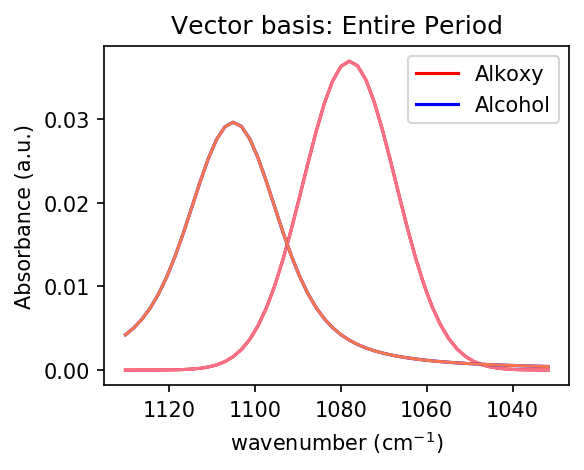

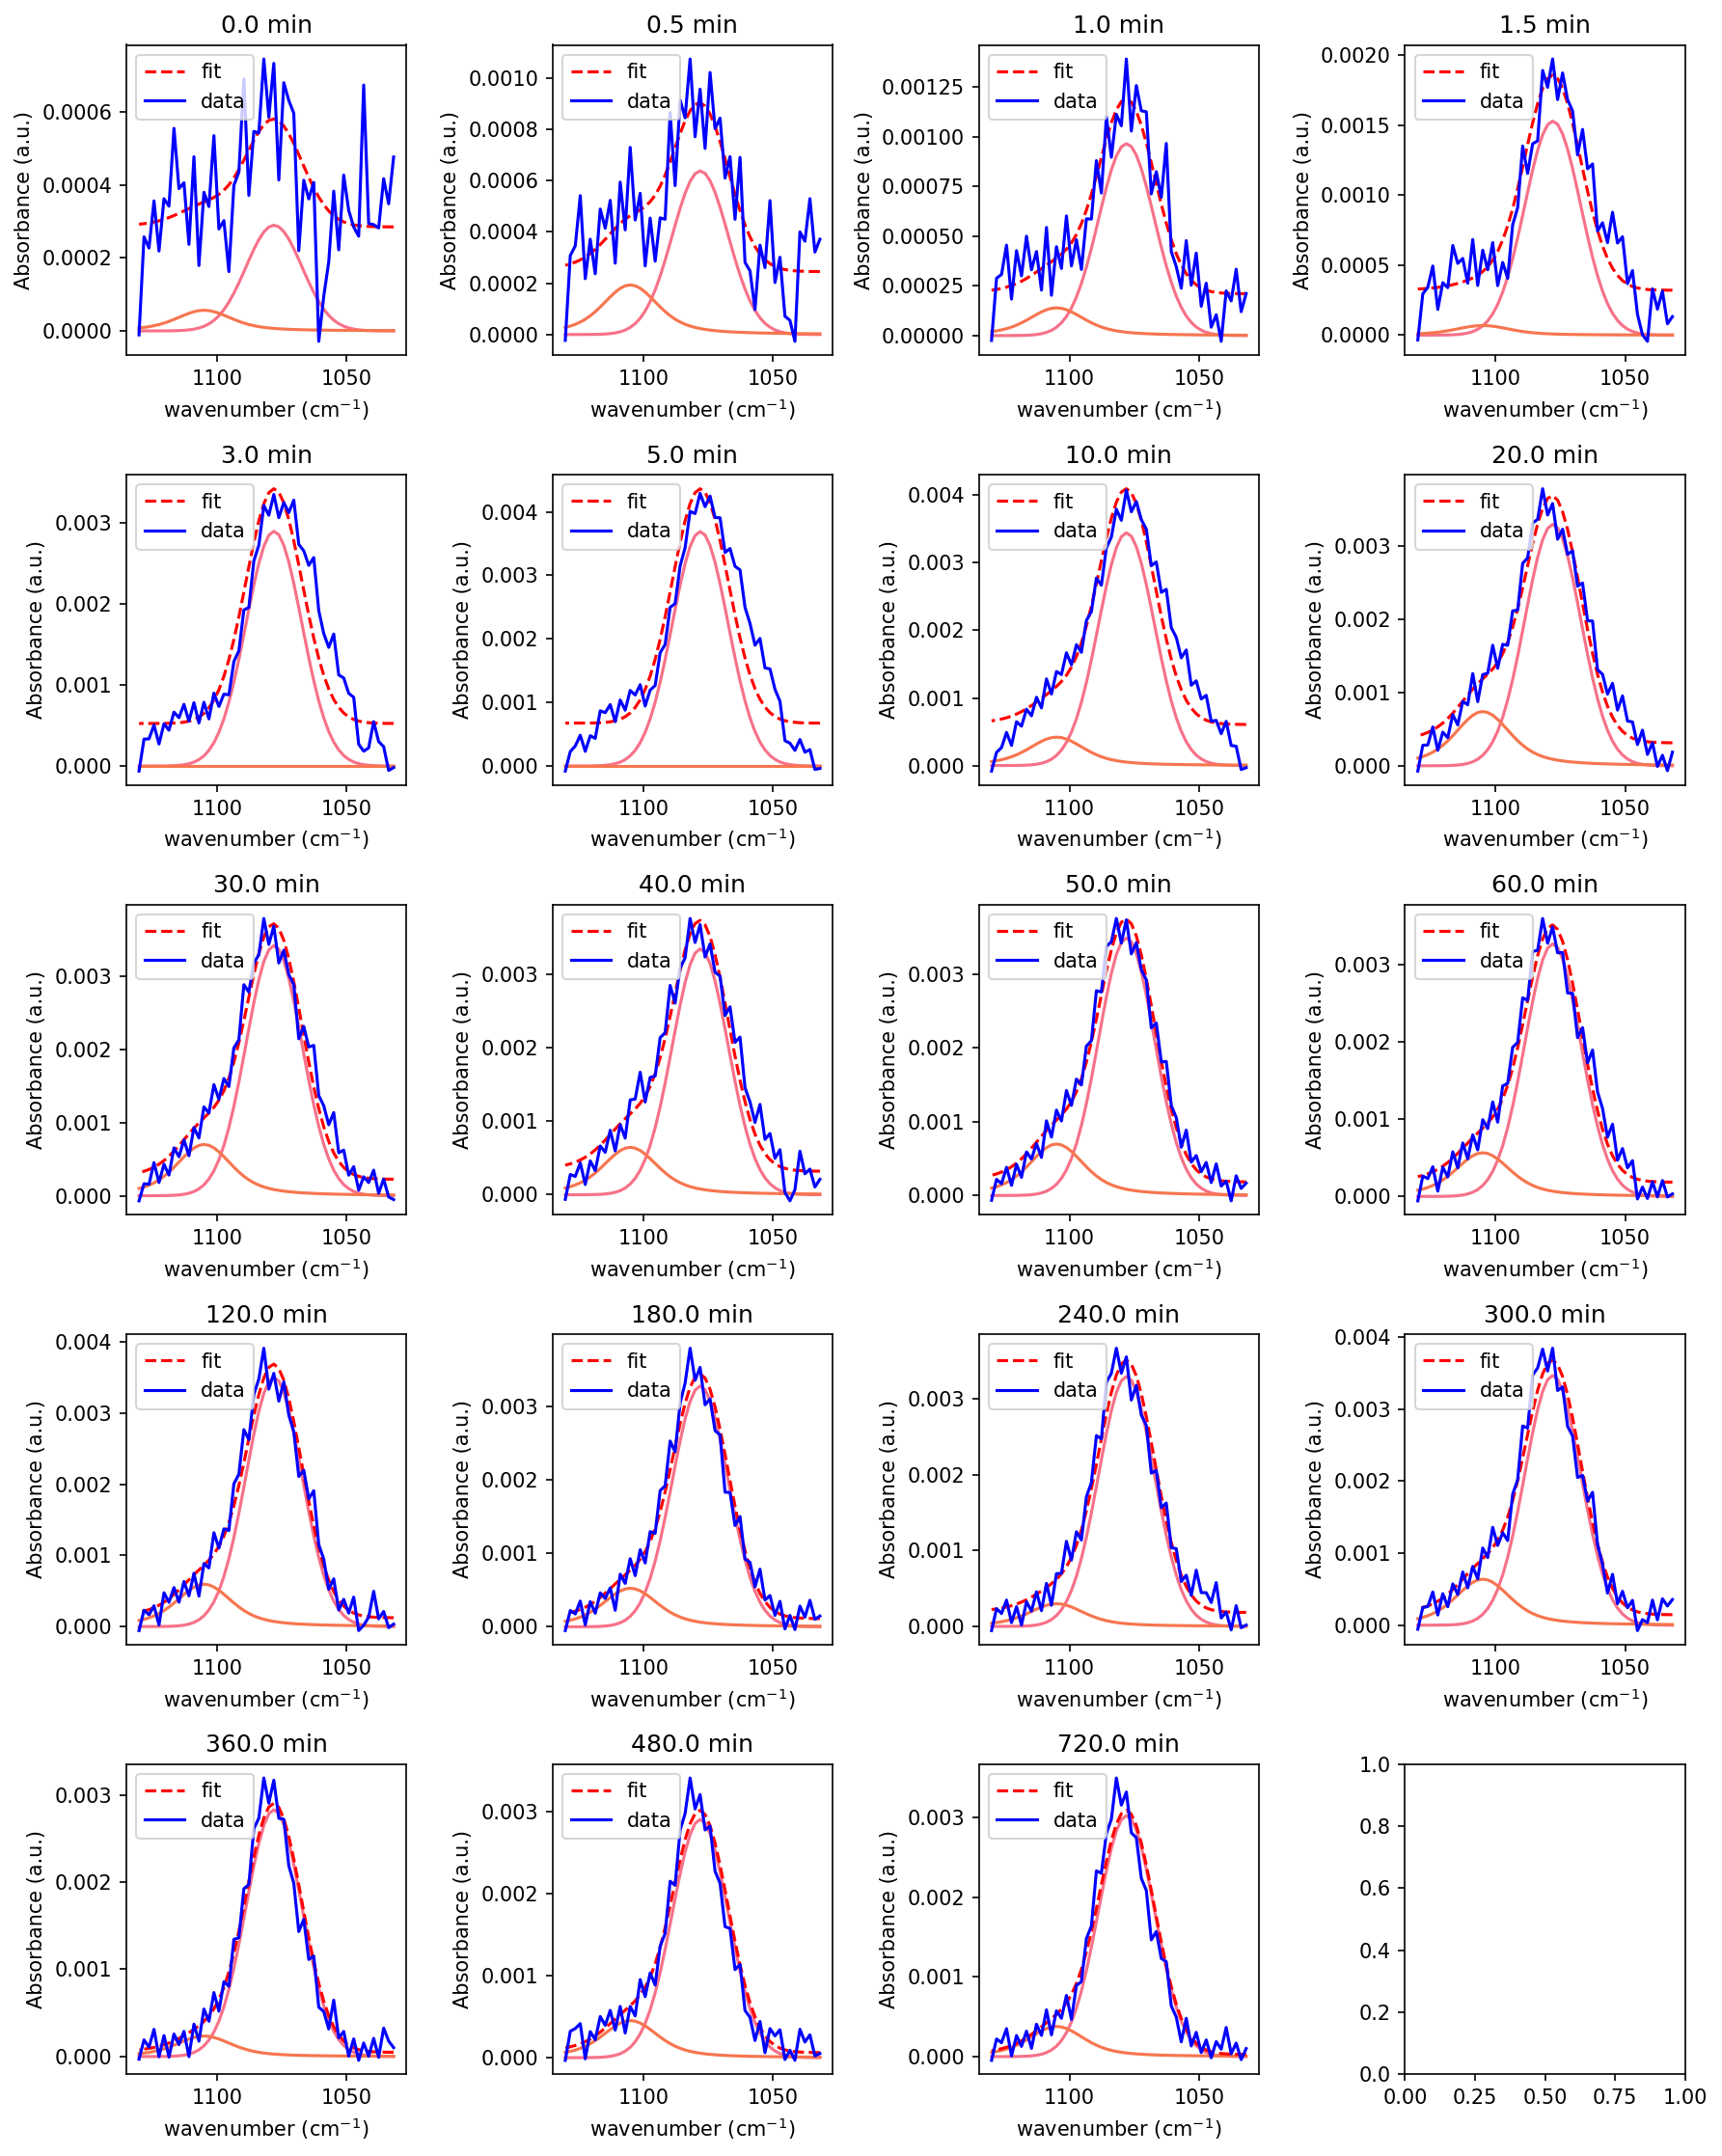

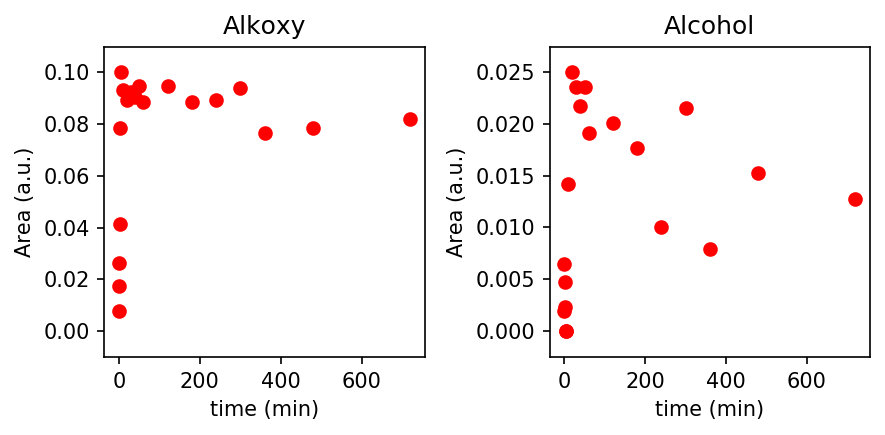

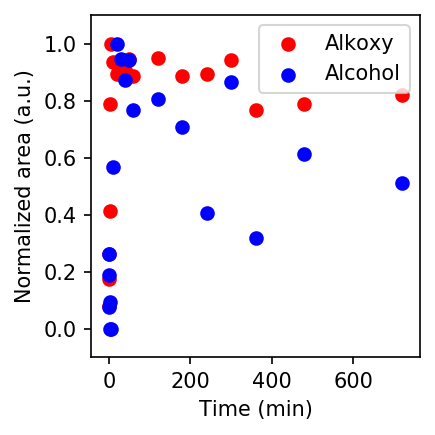

In [253]:
Vec_name_CO = ['Alkoxy','Alcohol']
yhat_CO = Generate_data(new_params_CO,x_CO,Vec_fit_CO,ndata=19)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CO.flatten(), yhat_CO.flatten())))
data_CO = Plot_data(new_params_CO,x_CO,y_CO,Vec_fit_CO,Time,Vec_name_CO,False)

# Summary of results

Finally, we want to summarized what we have leanrt so far. A set of plots summarizing the evolution of different surface species is demonstrated below. A table containing all the parameters of peaks at different stages are also listed. 

In [254]:
Final_combined_params = {'CH': data_CH,
                         'CC': data_CC,
                         'CO': data_CO,
                         'Time':pd.DataFrame(Time,columns=['Time'])}
Final_list = [[1,3,5],[4],[2,7,8]]
Plot_name = ['Formates and Carbonates','Aromatics','Aldehydes and Alkoxys']

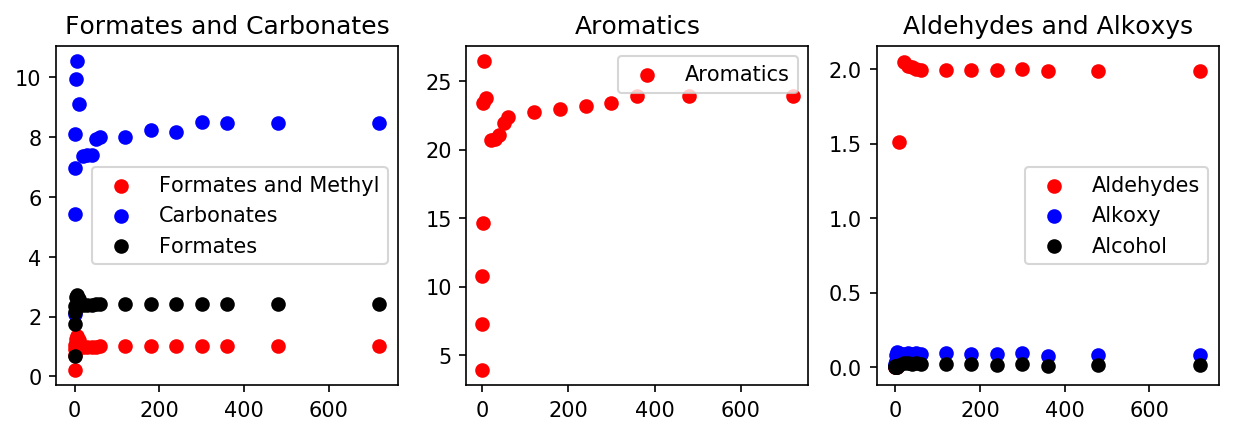

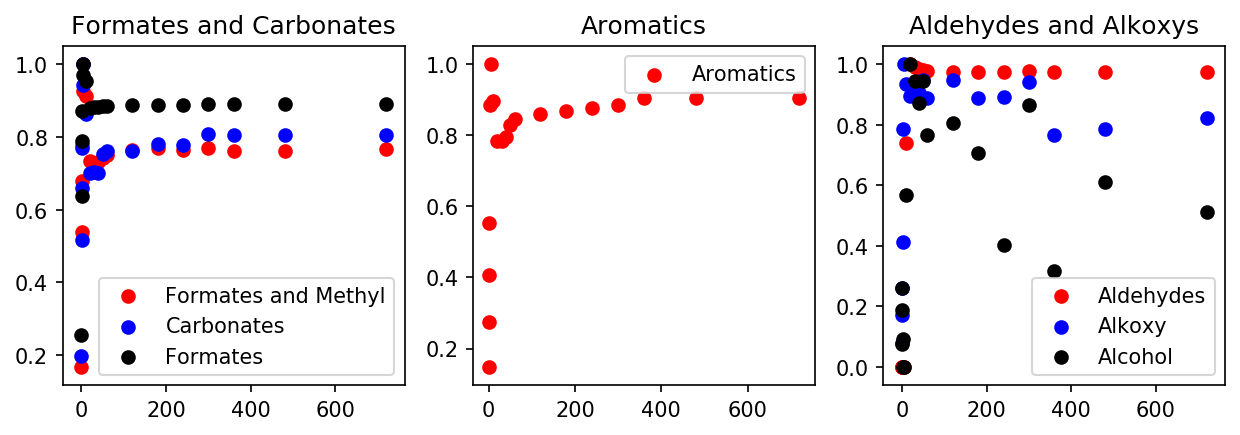

In [255]:
Final_plot(Final_combined_params, Final_list, Plot_name)

In [256]:
Print_var(new_params_CO,np.array(['Alkoxy\t','Alkoxy2\t']),Vec_IG_struc_CO)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Alkoxy		Gaussian	1078.0		10.8
Alkoxy2		Voigt		1105.0		7.0


In [257]:
Vec_assign = np.array([['Asy C-H','Asy C-H', 'Sym C-H', 'Sym C-H']])
Vec_assign_CC = np.array([['Alde C=O'],['O-C-O','Carbonyl'],
                          ['Aro1', 'Aro2', 'Aro3'],['Sym C=O','Asym C=O'],['Vib']])
Vec_assign_CO = np.array([['C-O1'],['C-O2']])

Final_peak_params = {'CH':{'Multi-stage':False,
                           'Params':new_params,
                           'Vec': Vec_IG_struc,
                           'Name':Vec_name,
                           'Assignment':Vec_assign},
                     'CC':{'Multi-stage':True,
                           'Params':[new_params_CC0,new_params_CC1,new_params_CC2],
                           'Vec': Vec_IG_struc_CC,
                           'Name':Vec_name_CC0,
                           'Assignment':Vec_assign_CC},
                     'CO':{'Multi-stage':False,
                           'Params':new_params_CO,
                           'Vec': Vec_IG_struc_CO,
                           'Name':Vec_name_CO,
                           'Assignment':Vec_assign_CO}}
Final_print(Final_peak_params)

Species		Vibrational			Peak
		Modes		Stage		Type		Position	Variance)	Relative Amplitude
								(cm-1)		(cm-1)		(a.u.)
Formates and Methyl	Asy C-H		All period	Voigt		2849.3		4.1		1.00
		Asy C-H				Voigt		2860.1		6.5		3.98
		Sym C-H				Voigt		2931.9		4.7		4.13
		Sym C-H				Voigt		2955.6		4.0		1.02
Aldehydes	Alde C=O	Initial		Voigt		1590.0		18.4		1.00
				Middle		Voigt		1610.0		20.0		1.00
				Final		Voigt		1616.2		2.9		1.00
Carbonates	O-C-O	Initial		Gaussian	1537.4		5.8		1.00
				Middle		Gaussian	1535.0		6.5		1.00
				Final		Gaussian	1540.2		2.4		1.00
		Carbonyl	Initial		Voigt		1547.3		17.8		3.02
				Middle		Voigt		1550.0		10.0		1.84
				Final		Voigt		1520.2		22.4		30.90
Aromatics	Aro1	Initial		Voigt		1525.1		5.2		1.00
				Middle		Voigt		1475.0		16.3		1.00
				Final		Voigt		1490.0		20.0		1.00
		Aro2	Initial		Voigt		1471.2		23.3		14.89
				Middle		Voigt		1430.0		20.0		0.70
				Final		Voigt		1461.4		13.4		9.92
		Aro3	Initial		Voigt		1374.3		26.0		15.59
				Middle		Voigt		1360.6		10.5		1.00